# India 2019 Election Analysis(EDA) and Prediction

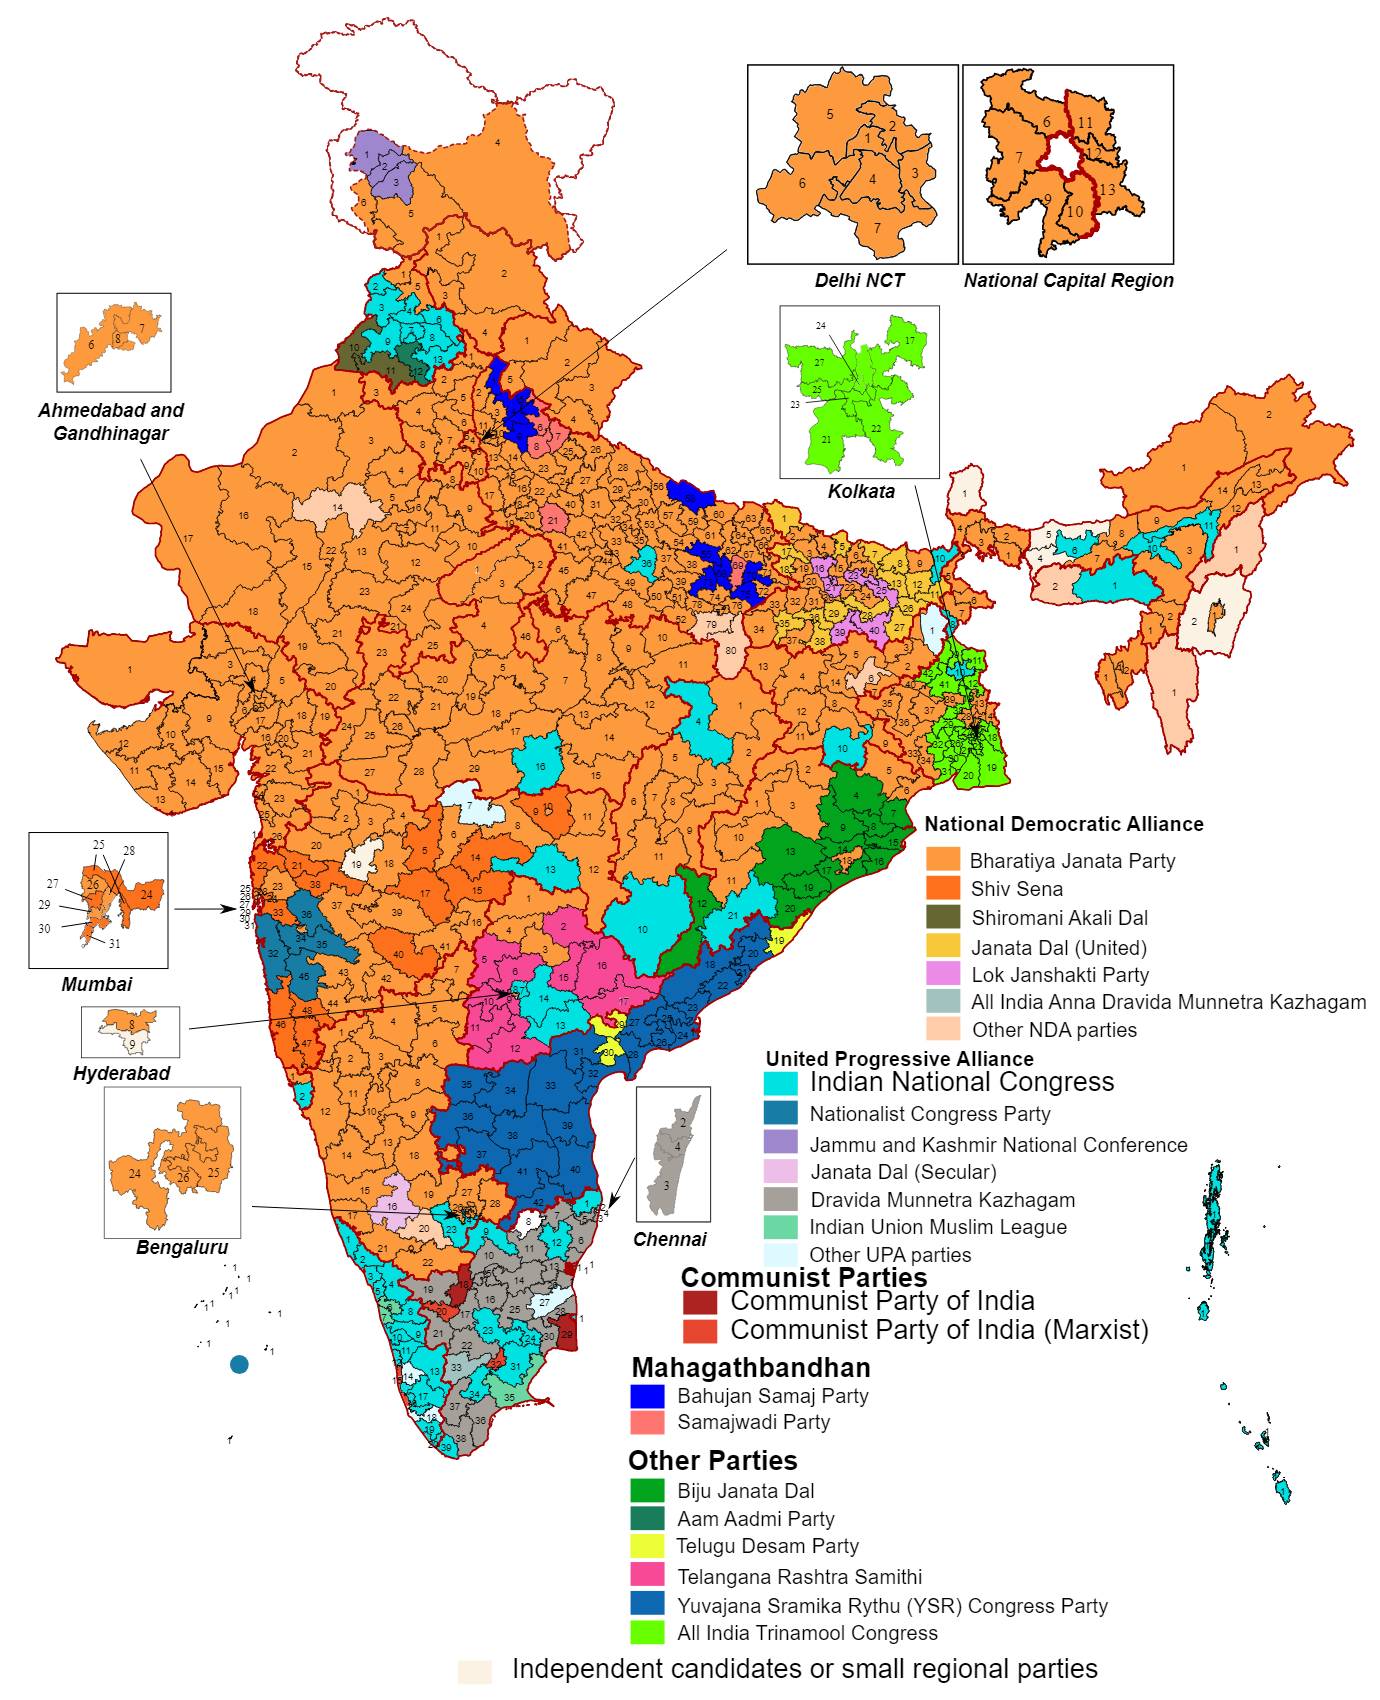

# Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [89]:
df = pd.read_csv('LS_2.0.csv')
df.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+          318665   
2  Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+          314057   
3                          NaN                          NaN           13030   
4  Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [90]:
# Row-Column
df.shape

(2263, 19)

In [91]:
#details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [92]:
df.columns = df.columns.str.replace('\n',' ') # To rename columns

In [93]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS  IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED  IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [94]:
#Null check
df.isnull().sum()

STATE                                         0
CONSTITUENCY                                  0
NAME                                          0
WINNER                                        0
PARTY                                         0
SYMBOL                                      245
GENDER                                      245
CRIMINAL CASES                              245
AGE                                         245
CATEGORY                                    245
EDUCATION                                   245
ASSETS                                      245
LIABILITIES                                 245
GENERAL VOTES                                 0
POSTAL VOTES                                  0
TOTAL VOTES                                   0
OVER TOTAL ELECTORS  IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED  IN CONSTITUENCY      0
TOTAL ELECTORS                                0
dtype: int64

In [95]:
# Statistical Overview
df.describe()

WINNER          AGE  GENERAL VOTES  POSTAL VOTES   TOTAL VOTES  \
count  2263.000000  2018.000000   2.263000e+03   2263.000000  2.263000e+03   
mean      0.238179    52.273538   2.615991e+05    990.710561  2.625898e+05   
std       0.426064    11.869373   2.549906e+05   1602.839174  2.559822e+05   
min       0.000000    25.000000   1.339000e+03      0.000000  1.342000e+03   
25%       0.000000    43.250000   2.103450e+04     57.000000  2.116250e+04   
50%       0.000000    52.000000   1.539340e+05    316.000000  1.544890e+05   
75%       0.000000    61.000000   4.858040e+05   1385.000000  4.872315e+05   
max       1.000000    86.000000   1.066824e+06  19367.000000  1.068569e+06   

       OVER TOTAL ELECTORS  IN CONSTITUENCY  \
count                           2263.000000   
mean                              15.811412   
std                               14.962861   
min                                0.097941   
25%                                1.296518   
50%                               10.510553   
75%                               29.468185   
max                               51.951012   

       OVER TOTAL VOTES POLLED  IN CONSTITUENCY  TOTAL ELECTORS  
count                               2263.000000    2.263000e+03  
mean                                  23.190525    1.658016e+06  
std                                   21.564758    3.145187e+05  
min                                    1.000039    5.518900e+04  
25%                                    1.899502    1.530014e+06  
50%                                   16.221721    1.679030e+06  
75%                                   42.590233    1.816857e+06  
max                                   74.411856    3.150313e+06

# Observations:

There were 2018 candidates who contested 2019 LokSabha Election.

Minimum age of the candidates was 25 whereas maximum age was 86.

Average age of all the candidates who contested election was 52.

19367 postal votes were casted in the election.

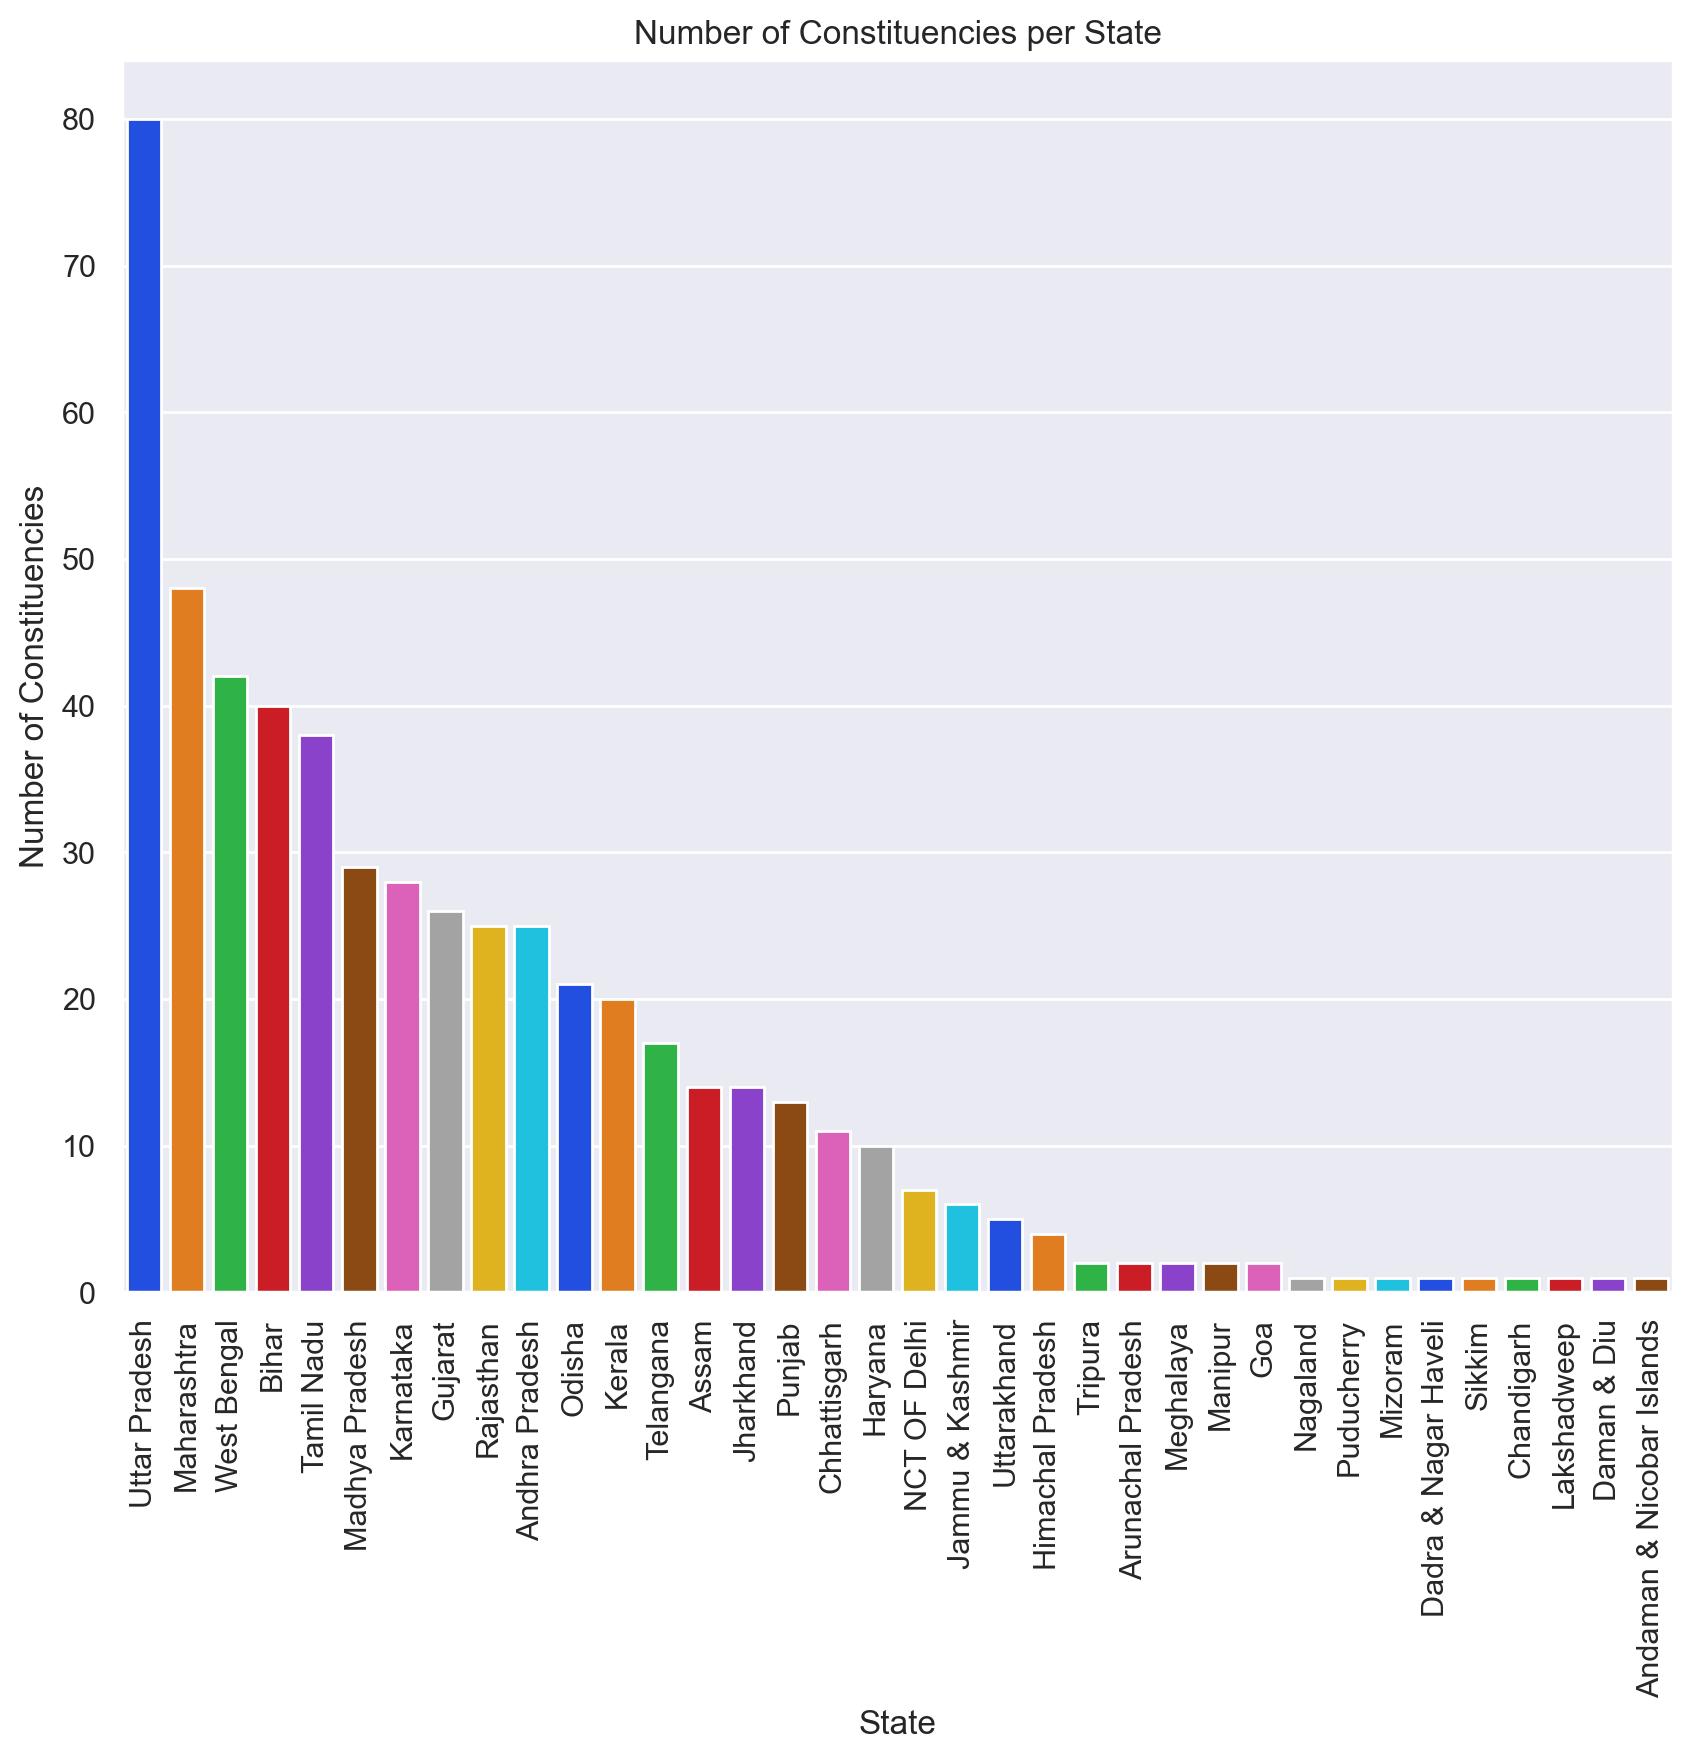

In [96]:
constituencies_per_state = df.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=constituencies_per_state, x='STATE', y='CONSTITUENCY', palette='bright')
plt.xticks(rotation=90)
plt.title('Number of Constituencies per State')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.show()

Uttar Pradesh has the highest of 80 constituencies.

# Candidates by Party

In [97]:
df1 = df[df['PARTY'] != 'NOTA']
cand_by_party = df1['PARTY'].value_counts().sort_values(ascending = False).head(50).reset_index()

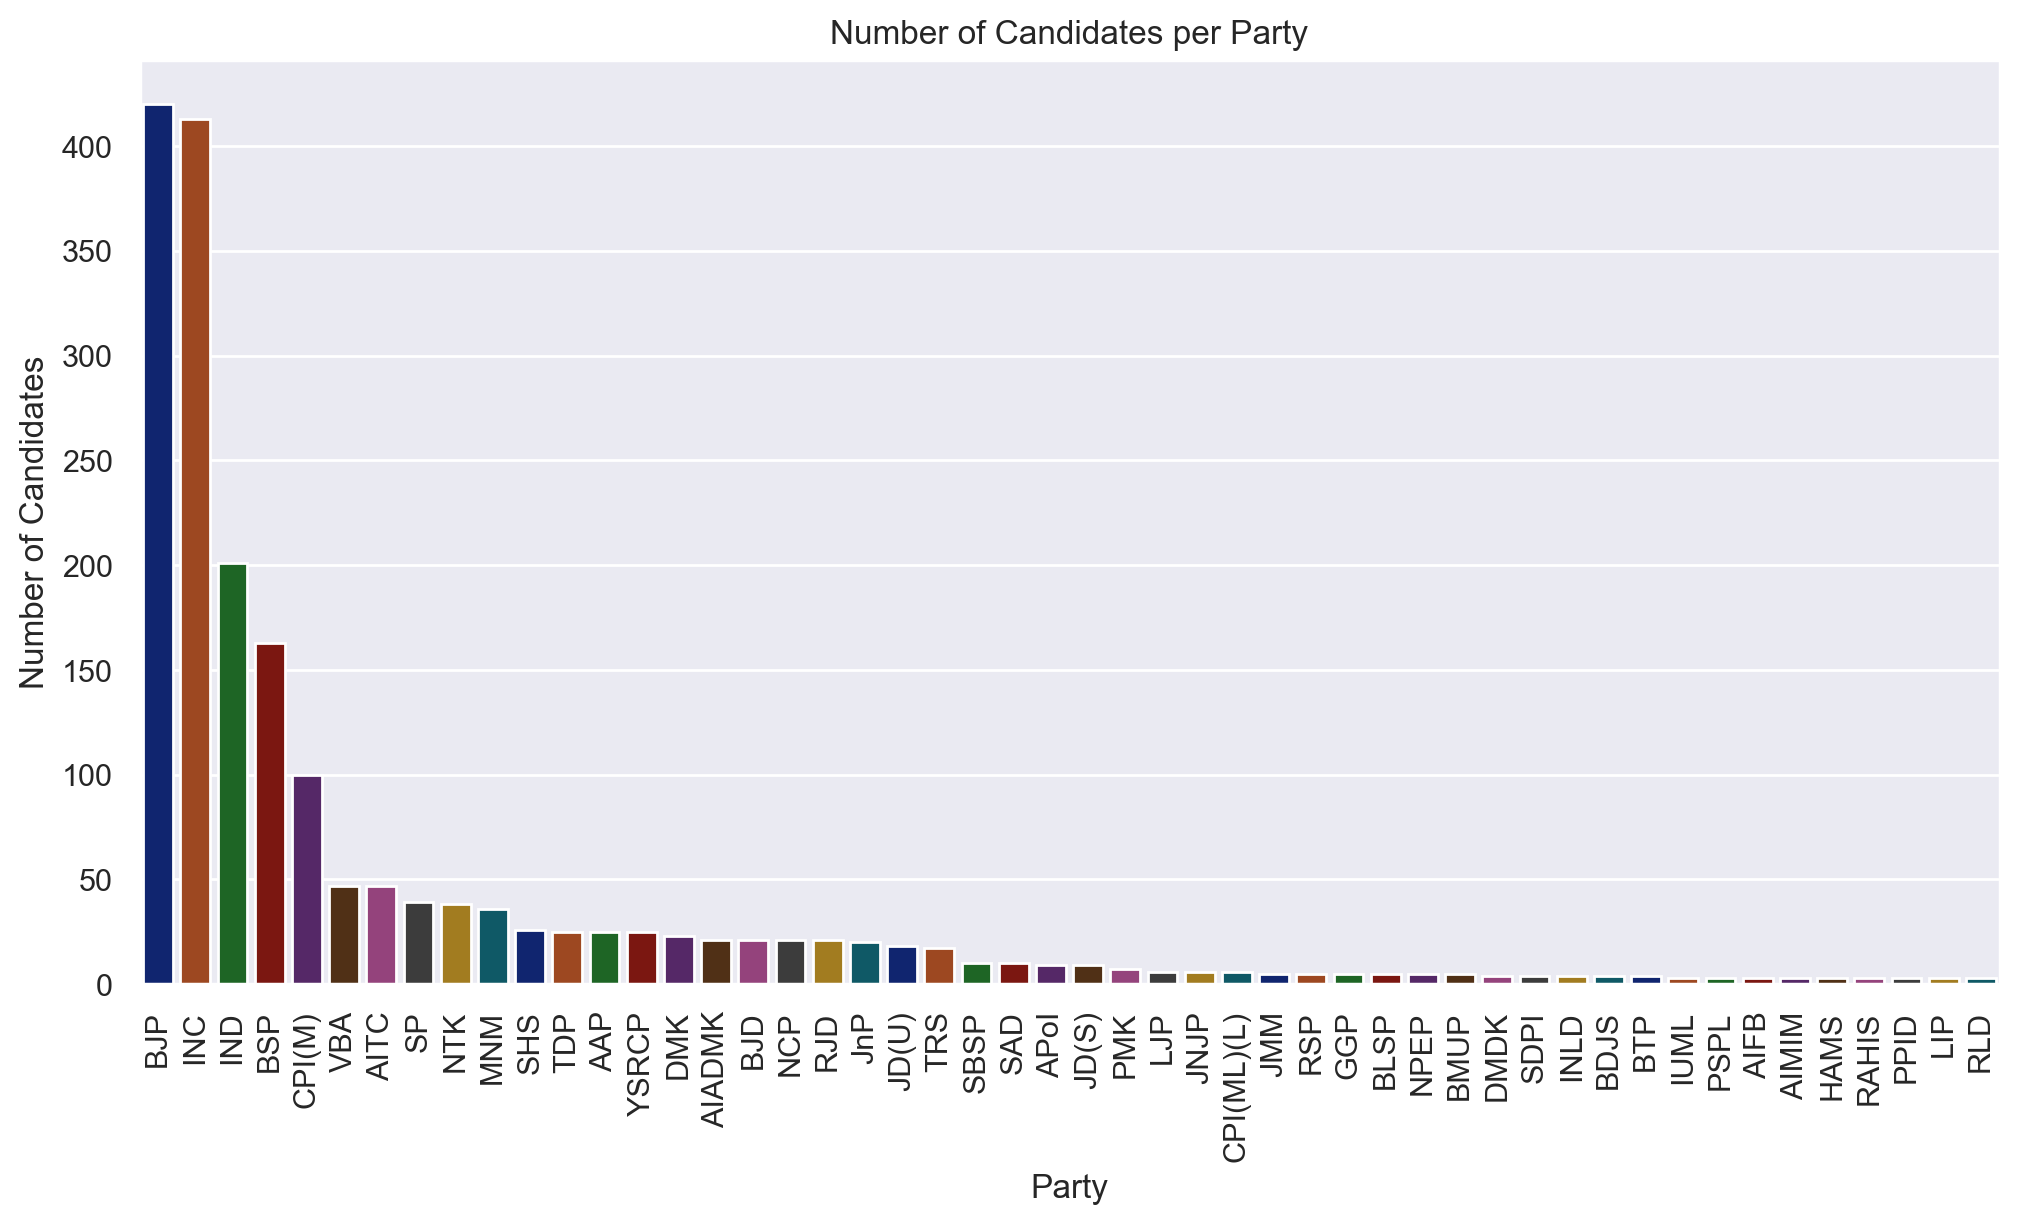

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cand_by_party, x='PARTY', y='count', palette='dark')
plt.xticks(rotation=90)
plt.title('Number of Candidates per Party')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.show()

BJP had fielded the highest of 420 candidates whereas INC had 413 candidates.

# Partywise Vote Share

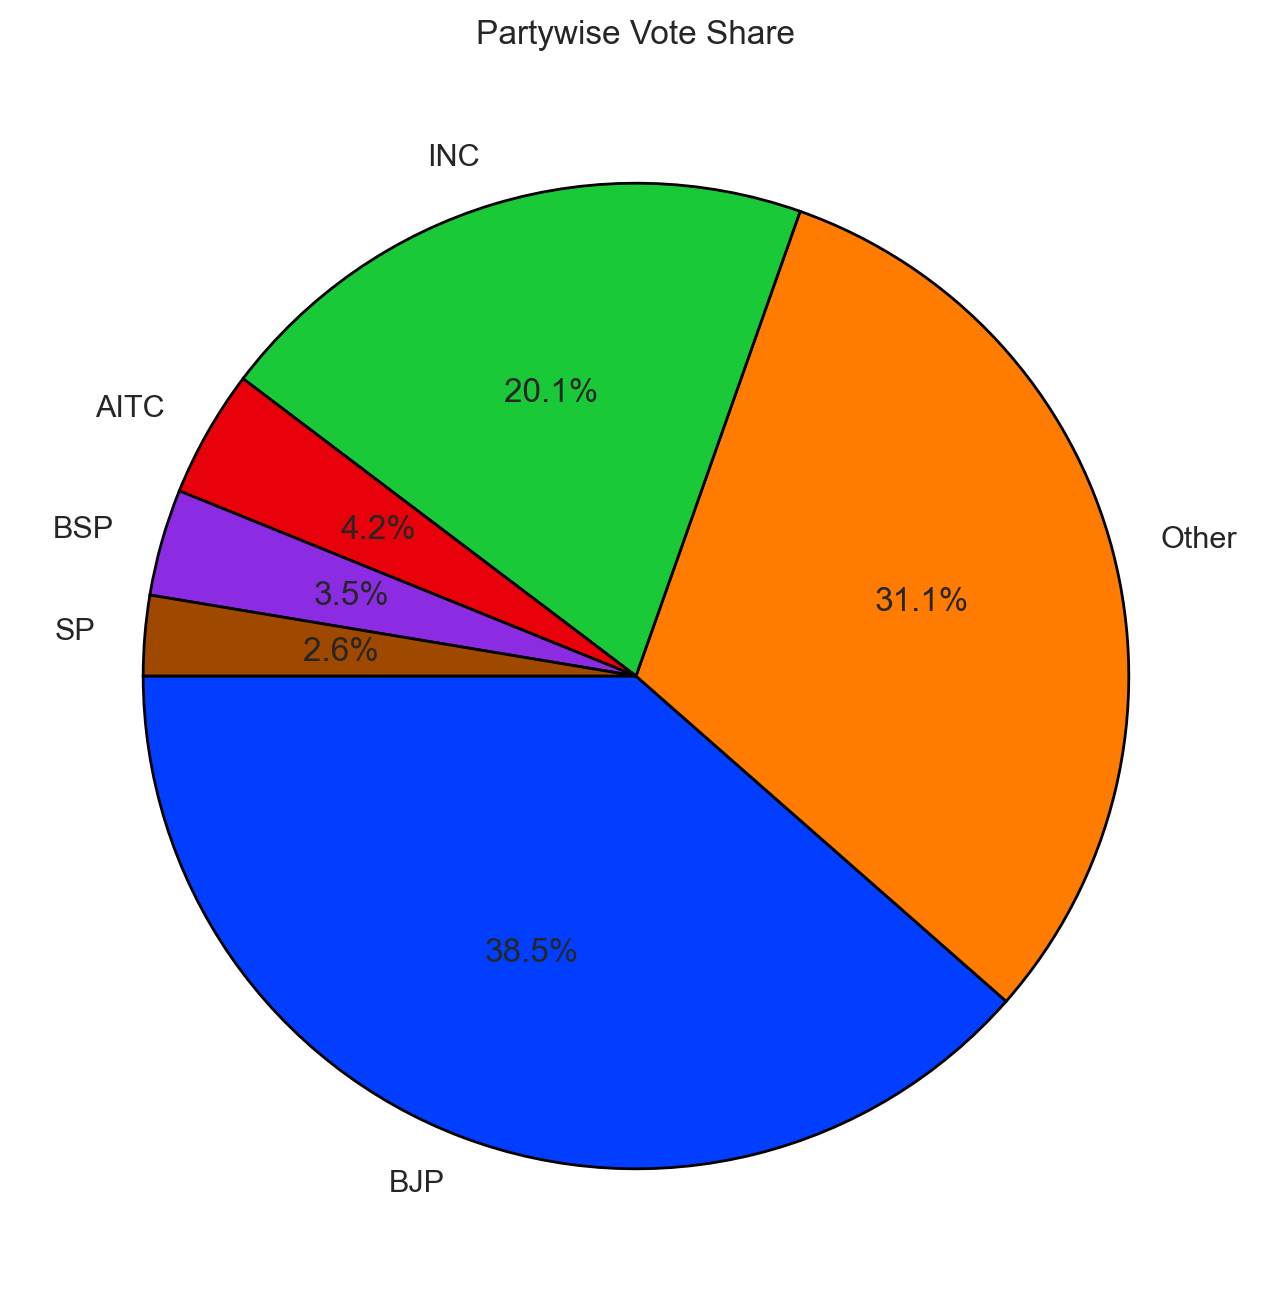

In [99]:
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()

# Function to classify parties as top 5 or 'Other'
def vote_share(row):
    if row['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return row['PARTY']

# Apply the function to create a new column
df['Party New'] = df.apply(vote_share, axis=1)

# Group by the new party classification and sum the votes
counts = df.groupby('Party New')['TOTAL VOTES'].sum().sort_values(ascending=False)
labels = counts.index
values = counts.values

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('bright', len(labels)), wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Partywise Vote Share')

# Show plot
plt.show()

# Seats Won by Party

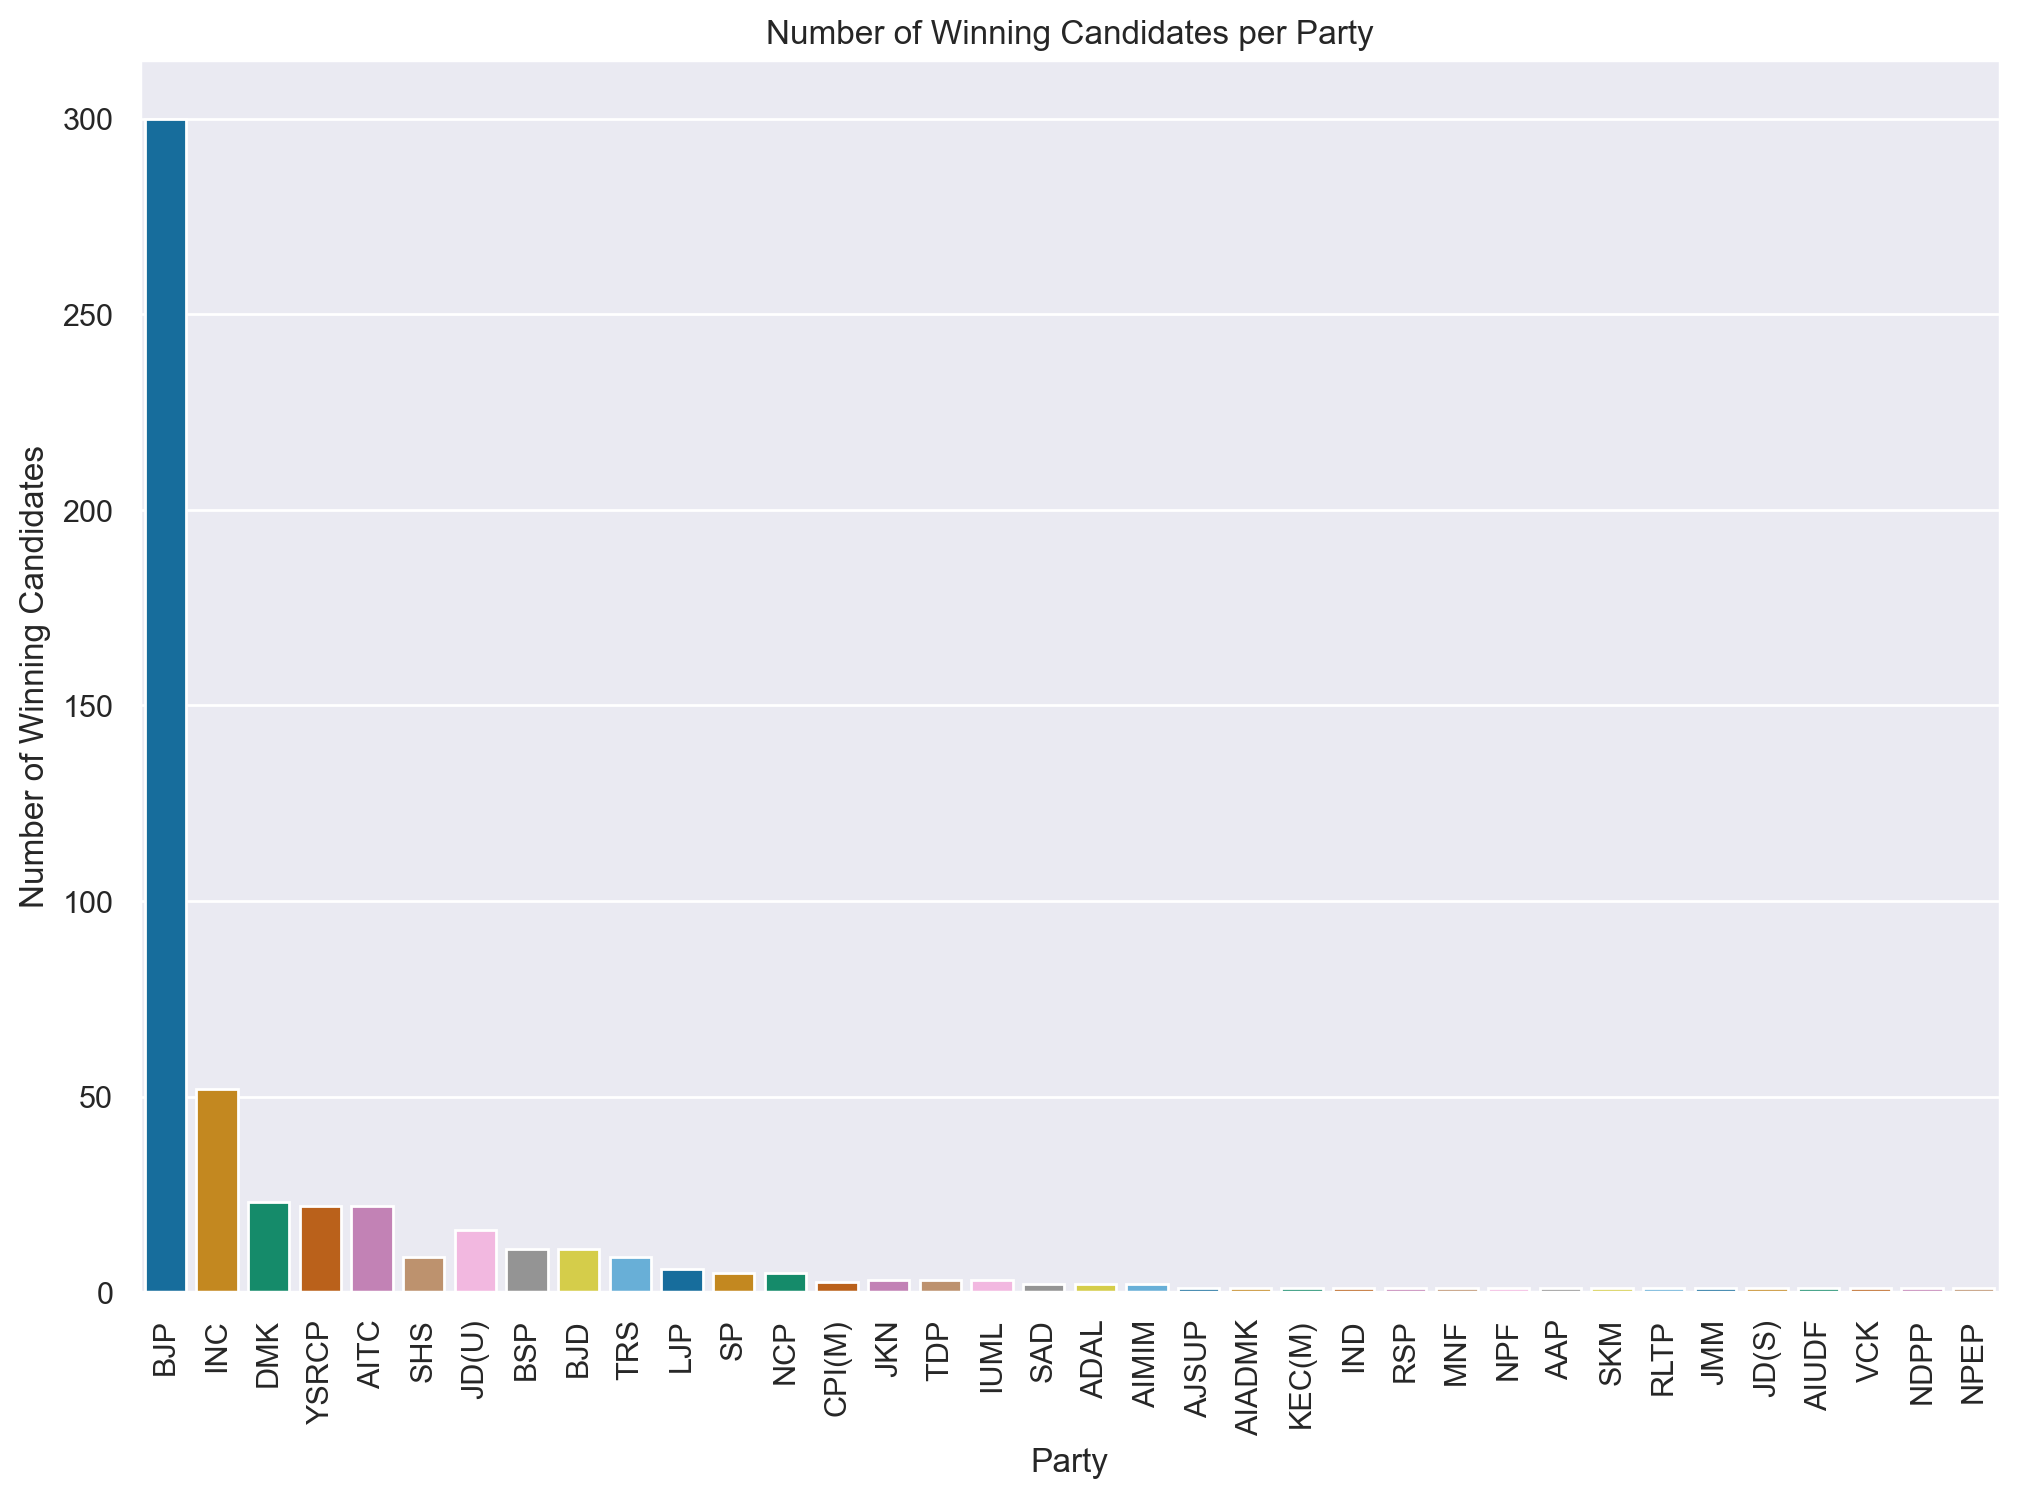

In [100]:
winning_candidates_per_party = df.groupby(['PARTY', 'SYMBOL'])['WINNER'].sum().reset_index().sort_values('WINNER', ascending=False)

# Filter out rows where WINNER is 0
winning_candidates_per_party = winning_candidates_per_party[winning_candidates_per_party['WINNER'] > 0]

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=winning_candidates_per_party, x='PARTY', y='WINNER', palette='colorblind', ci = None)

# Add title and labels
plt.title('Number of Winning Candidates per Party')
plt.xlabel('Party')
plt.ylabel('Number of Winning Candidates')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

BJP achieved a landslide victory winning 300 seats whereas INC won only 52 seats

# Age of Candidates

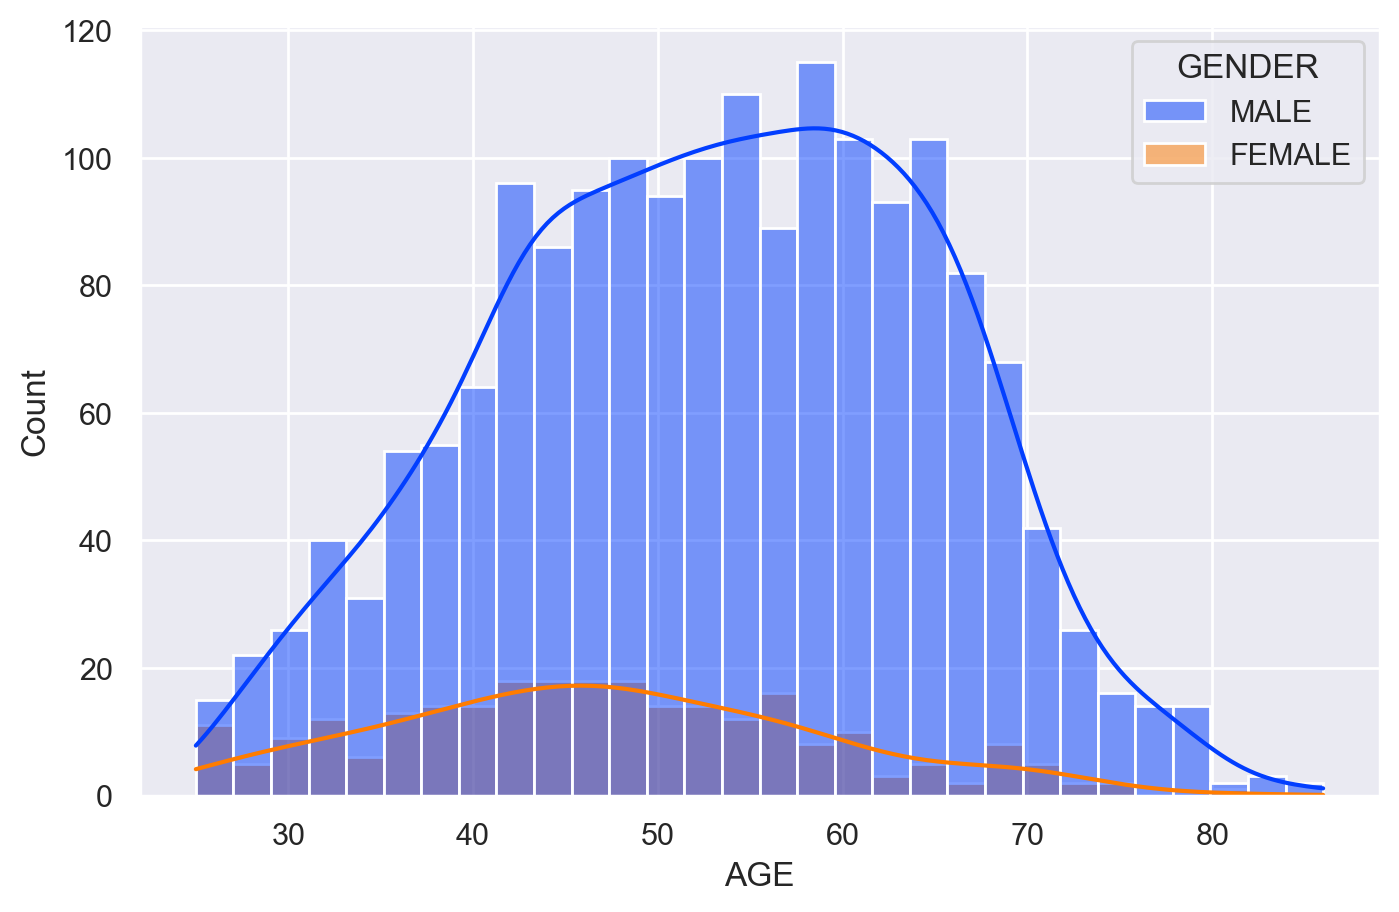

In [101]:
sns.histplot(x = 'AGE', data = df, hue = 'GENDER', bins = 30, kde = True, palette = 'bright')
plt.show()

Age of all the candidates who contested election follows normal distribution with mean 52

# Age of Candidates by Gender

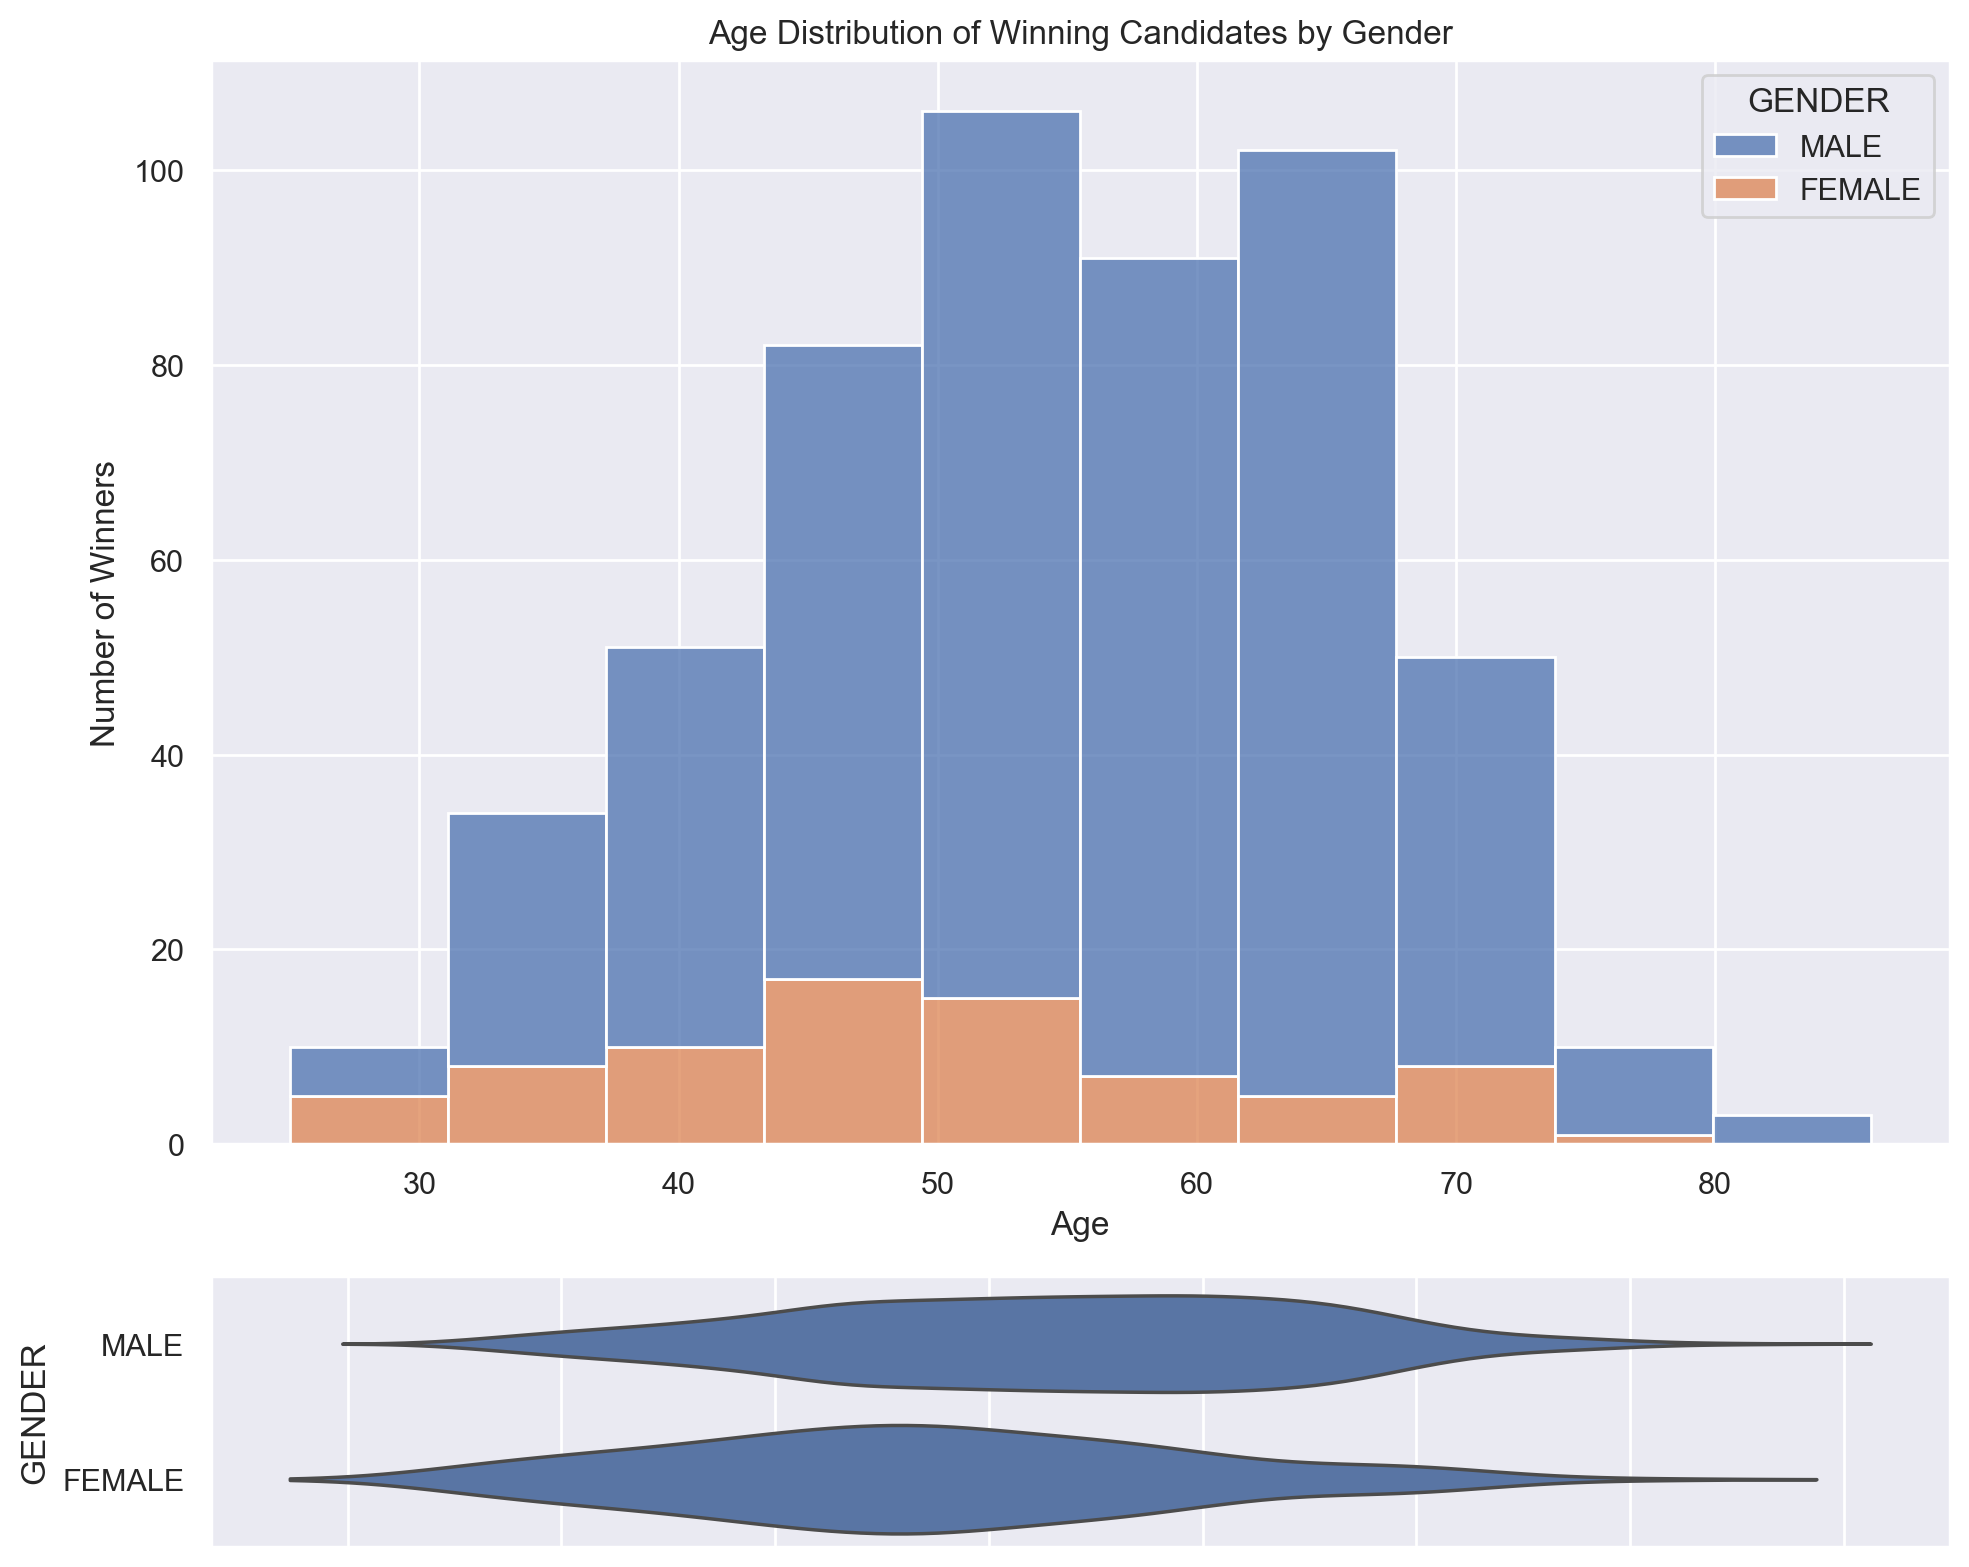

In [102]:
df_clean = df.dropna()

# Create a figure with subplots
fig, (ax_hist, ax_violin) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 8))

# Plot the histogram
sns.histplot(data=df_clean, x="AGE", weights="WINNER", hue="GENDER", multiple="stack", ax=ax_hist)

# Plot the violin plot
sns.violinplot(data=df_clean, x="AGE", y="GENDER", ax=ax_violin, inner=None)

# Customize the plot
ax_hist.set_title('Age Distribution of Winning Candidates by Gender')
ax_hist.set_xlabel('Age')
ax_hist.set_ylabel('Number of Winners')

# Hide the x labels of the violin plot to avoid overlap
ax_violin.set_xlabel('')
ax_violin.set_xticklabels([])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

# Top 10 Youngest Winning Candidates

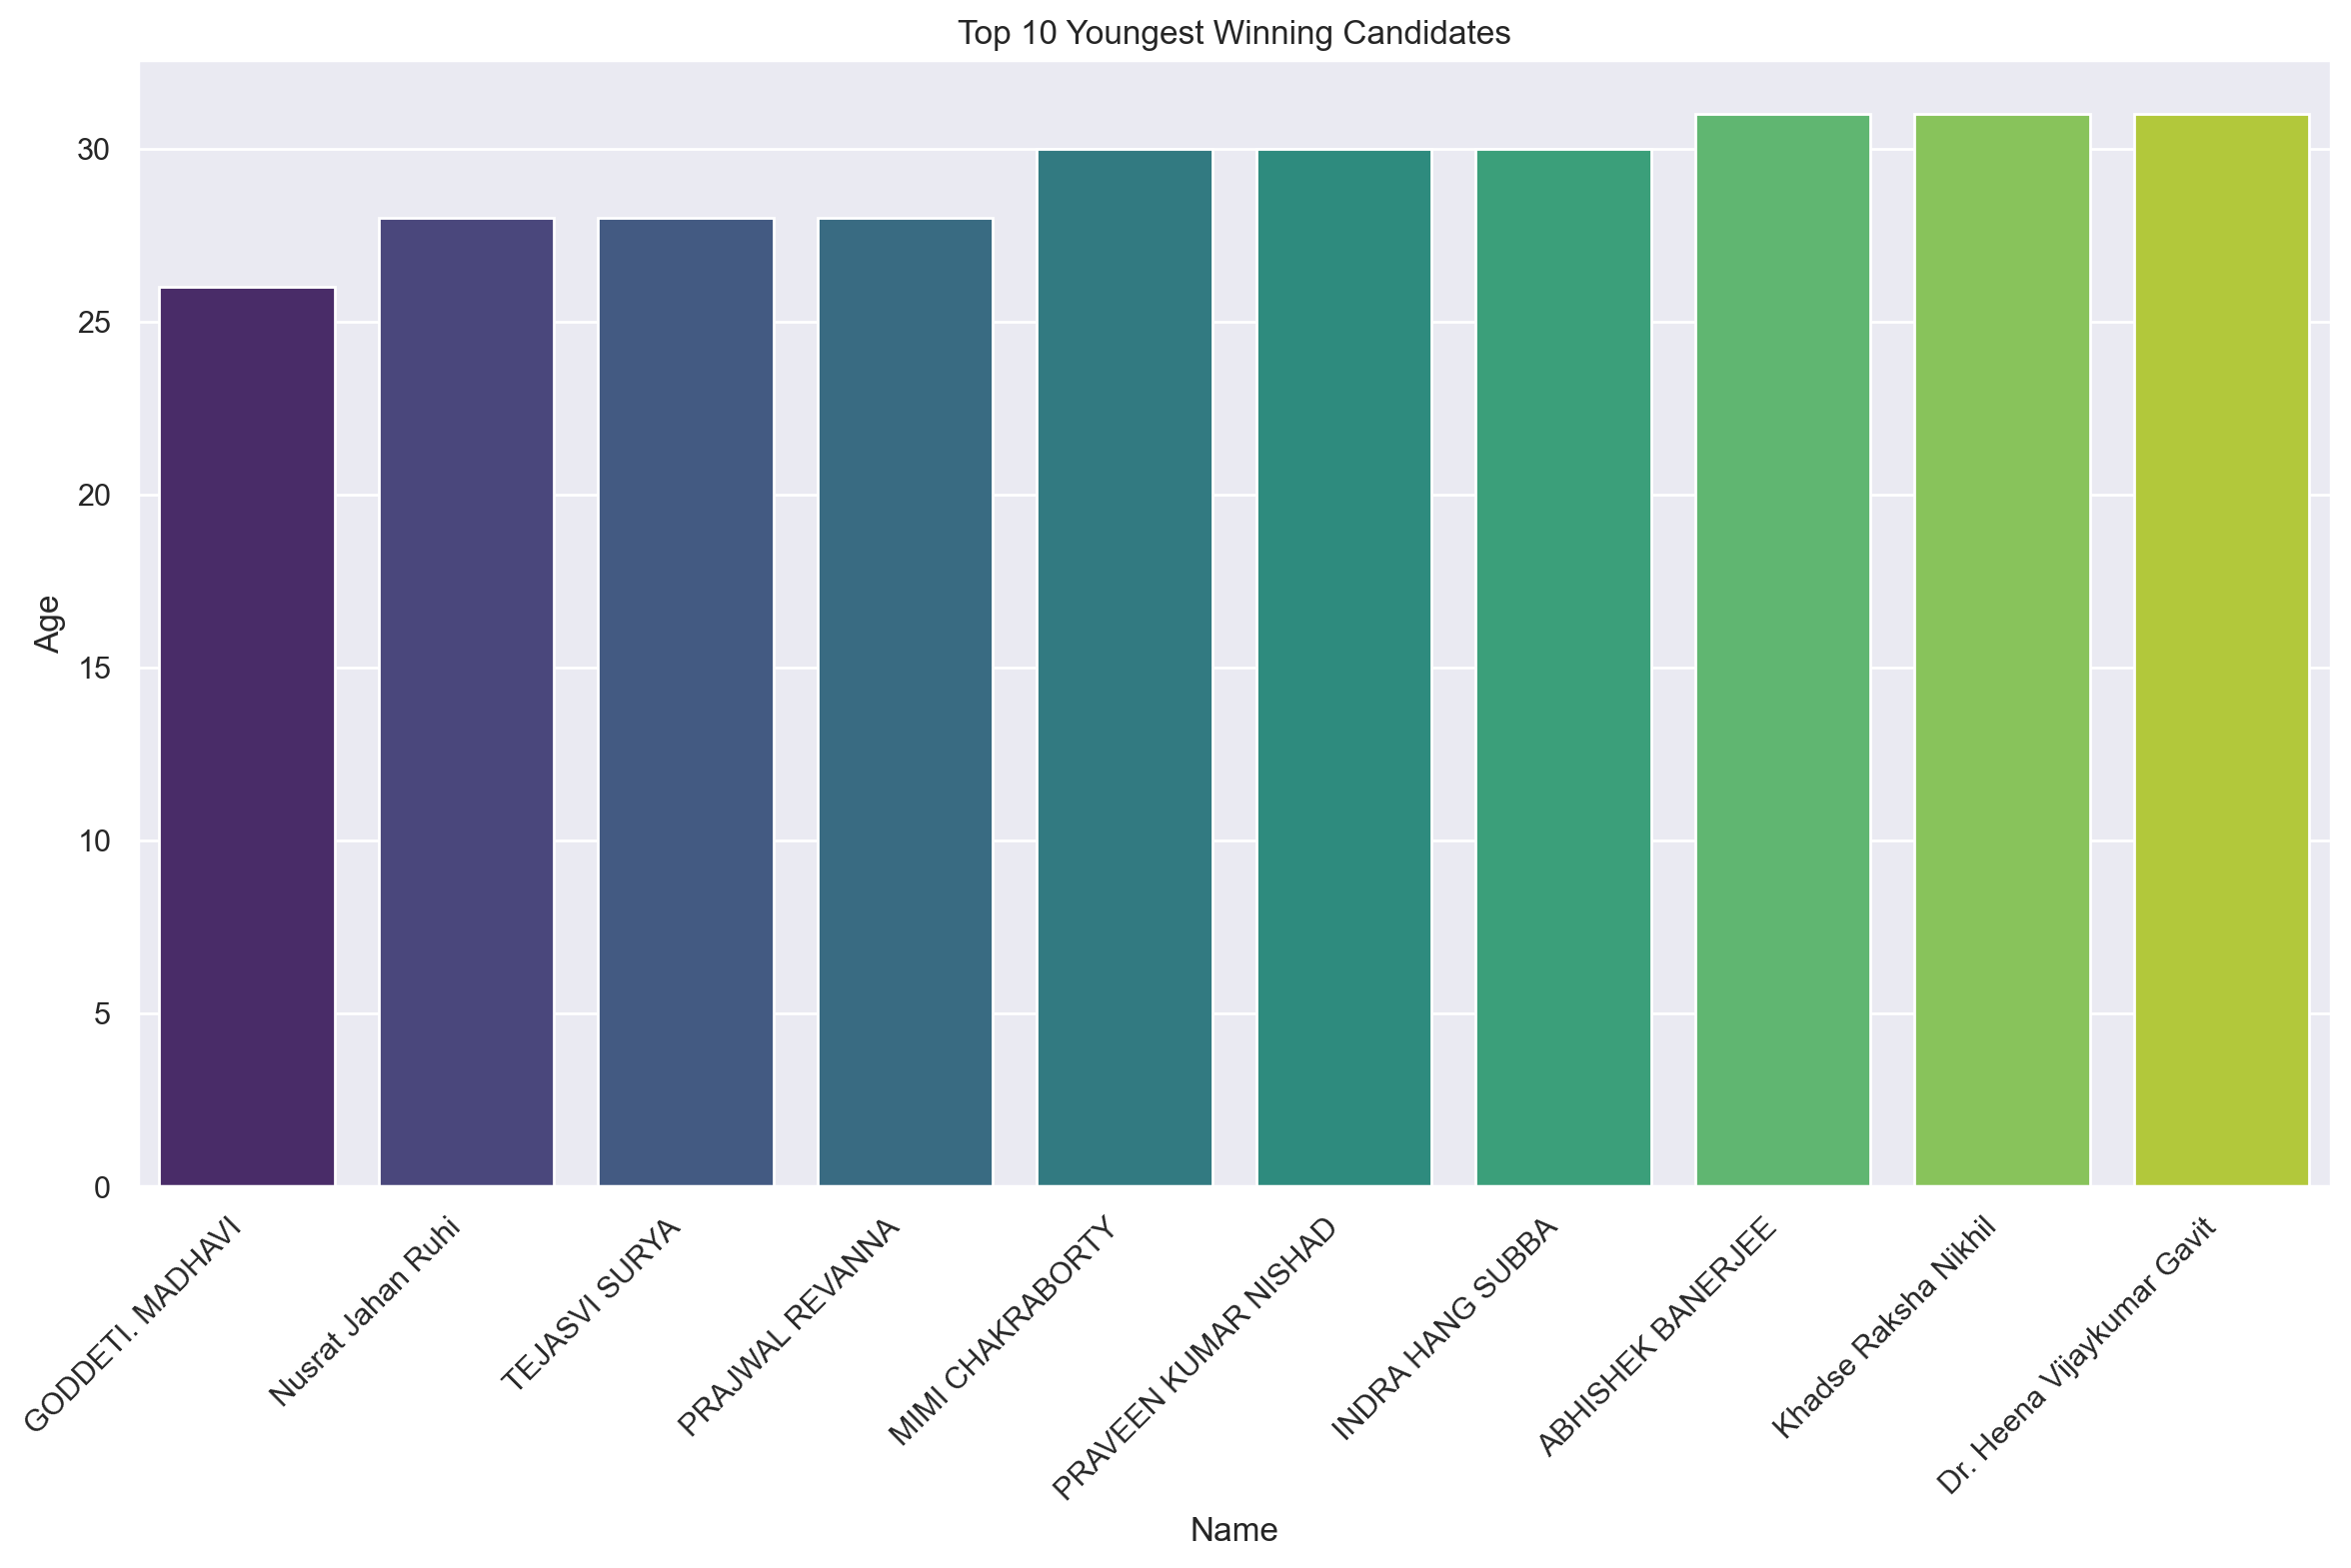

In [103]:
df_winners = df[df['WINNER'] == 1]

# Sort by age and select the top 10 youngest winners
df_winners = df_winners.sort_values('AGE').head(10)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_winners, x='NAME', y='AGE', palette='viridis')

# Add title and labels
plt.title('Top 10 Youngest Winning Candidates')
plt.xlabel('Name')
plt.ylabel('Age')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Top 10 Oldest Winning Candidates

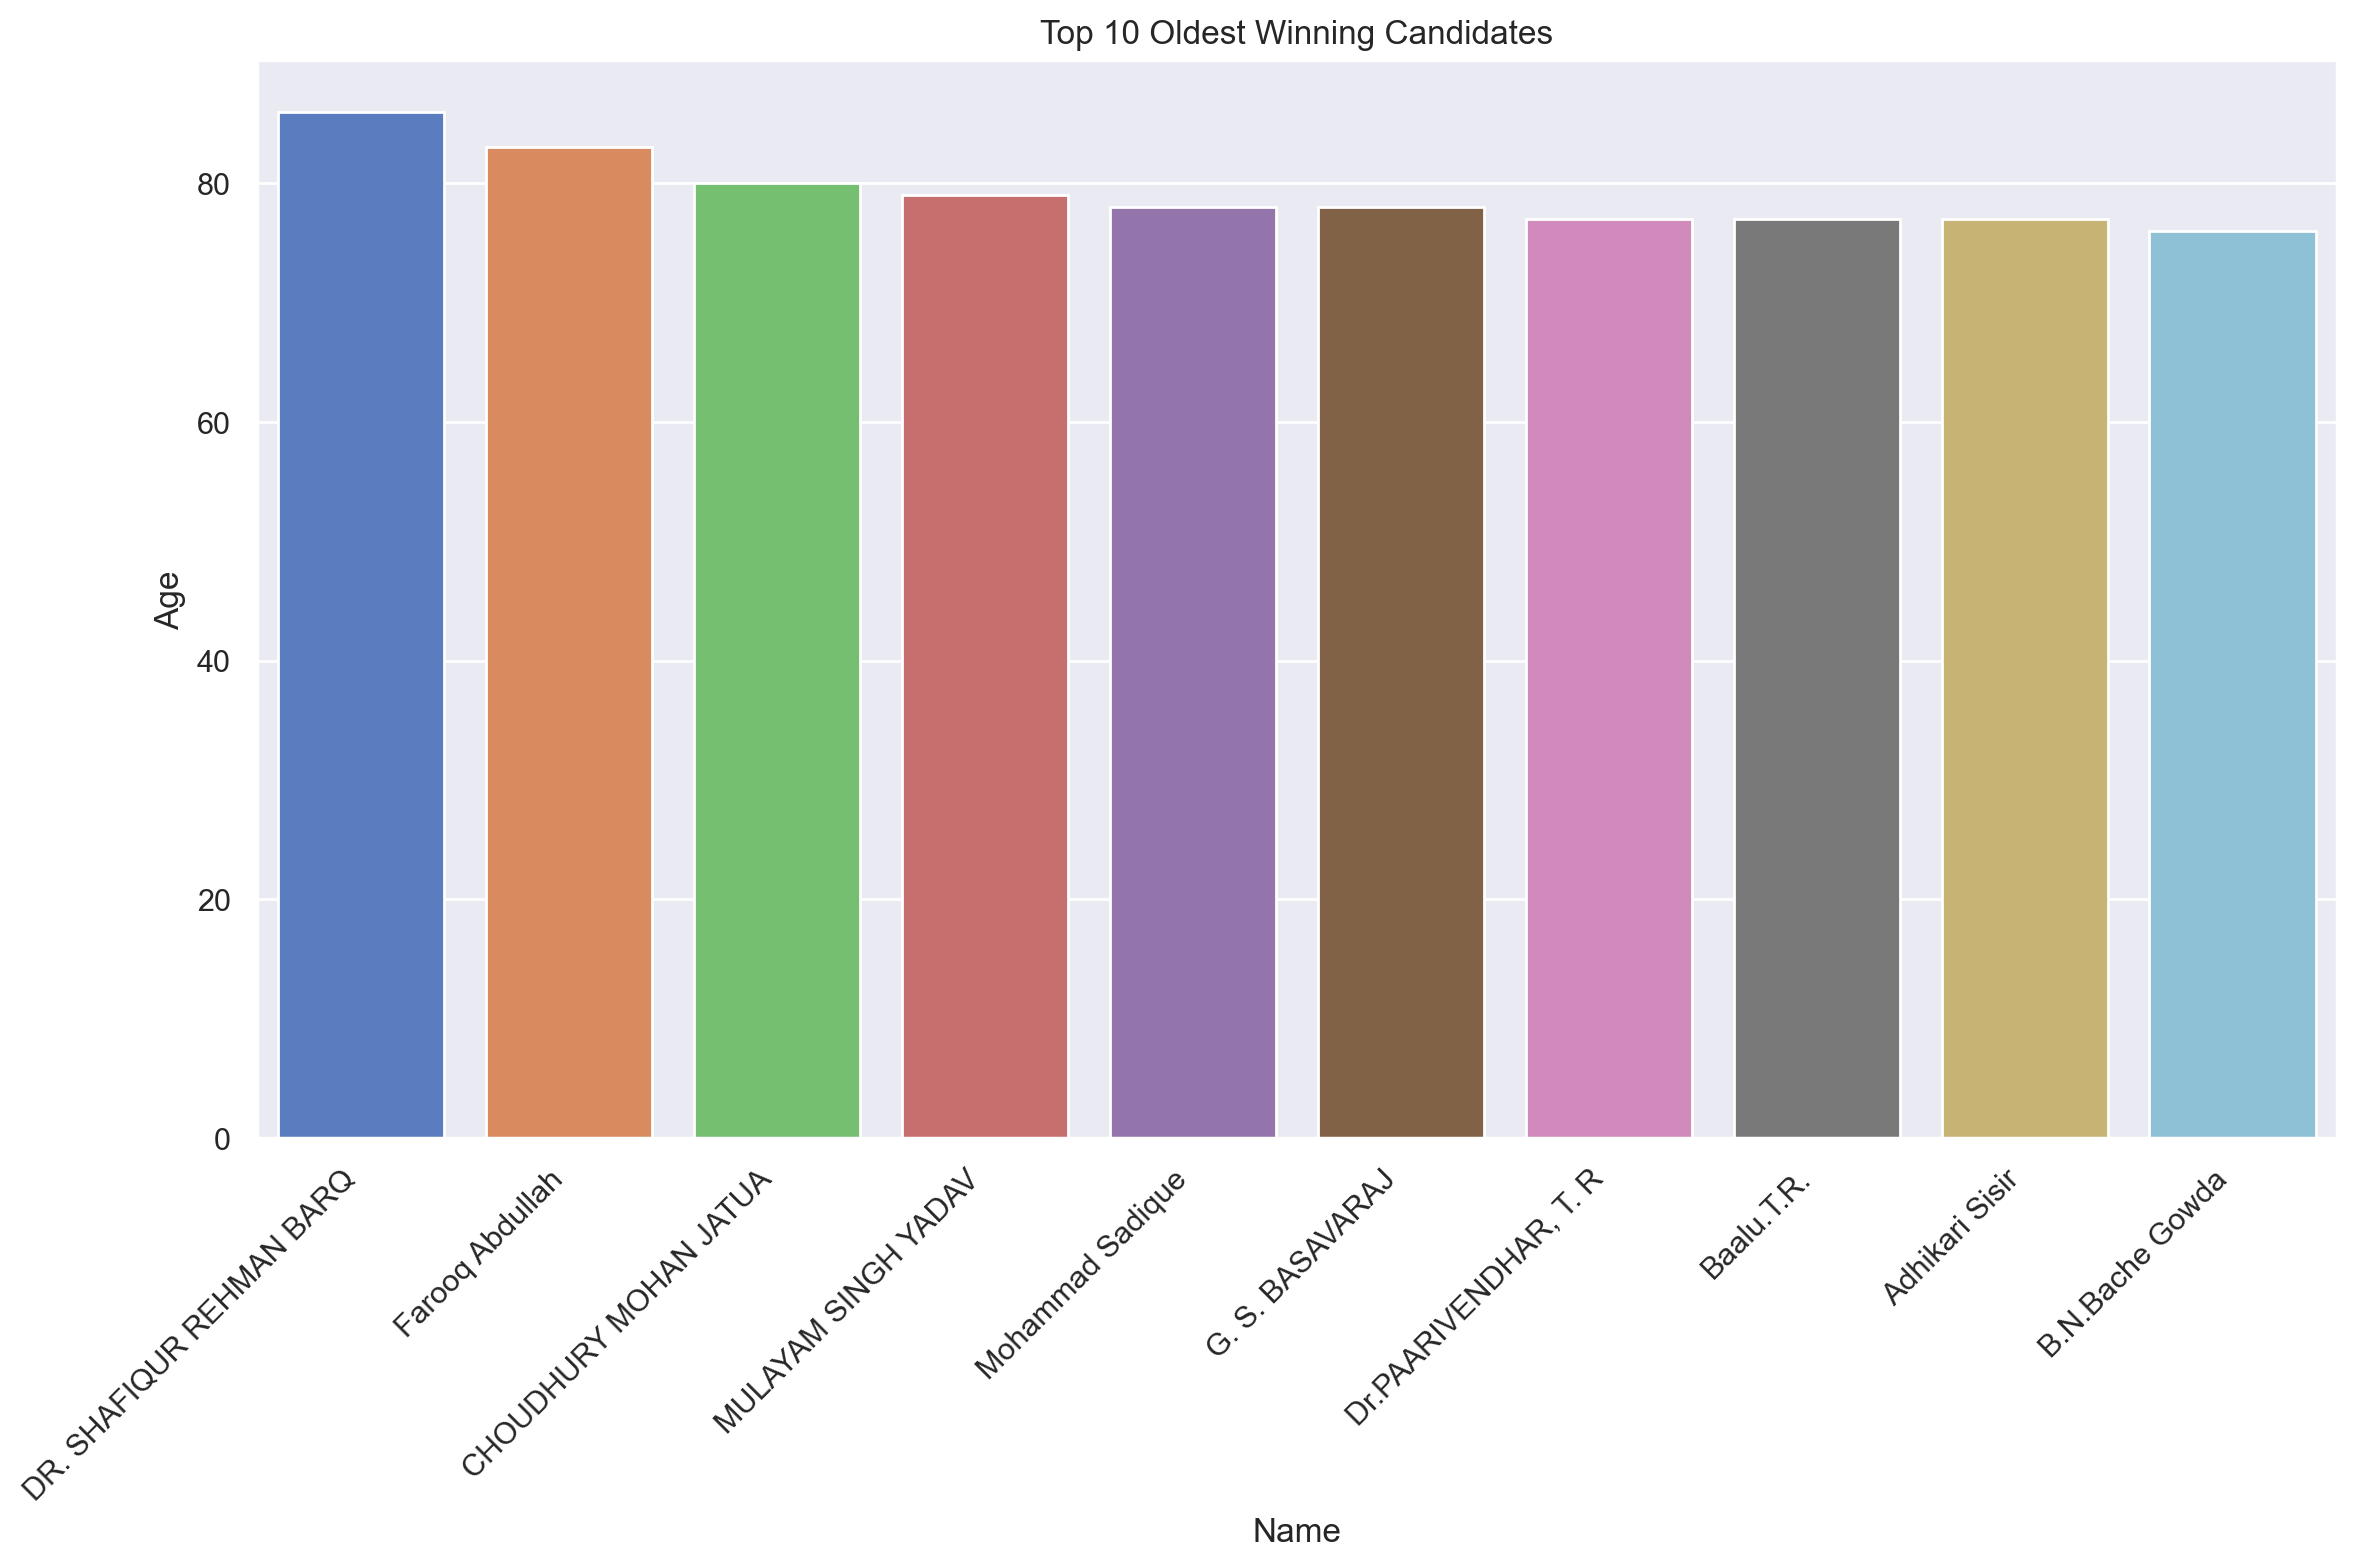

In [104]:
df_winners = df[df['WINNER'] == 1]

# Sort by age in descending order and select the top 10 oldest winners
df_winners = df_winners.sort_values('AGE', ascending=False).head(10)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_winners, x='NAME', y='AGE', palette='muted', dodge=False)

# Add title and labels
plt.title('Top 10 Oldest Winning Candidates')
plt.xlabel('Name')
plt.ylabel('Age')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [78]:
# Criminal Cases against Candidates

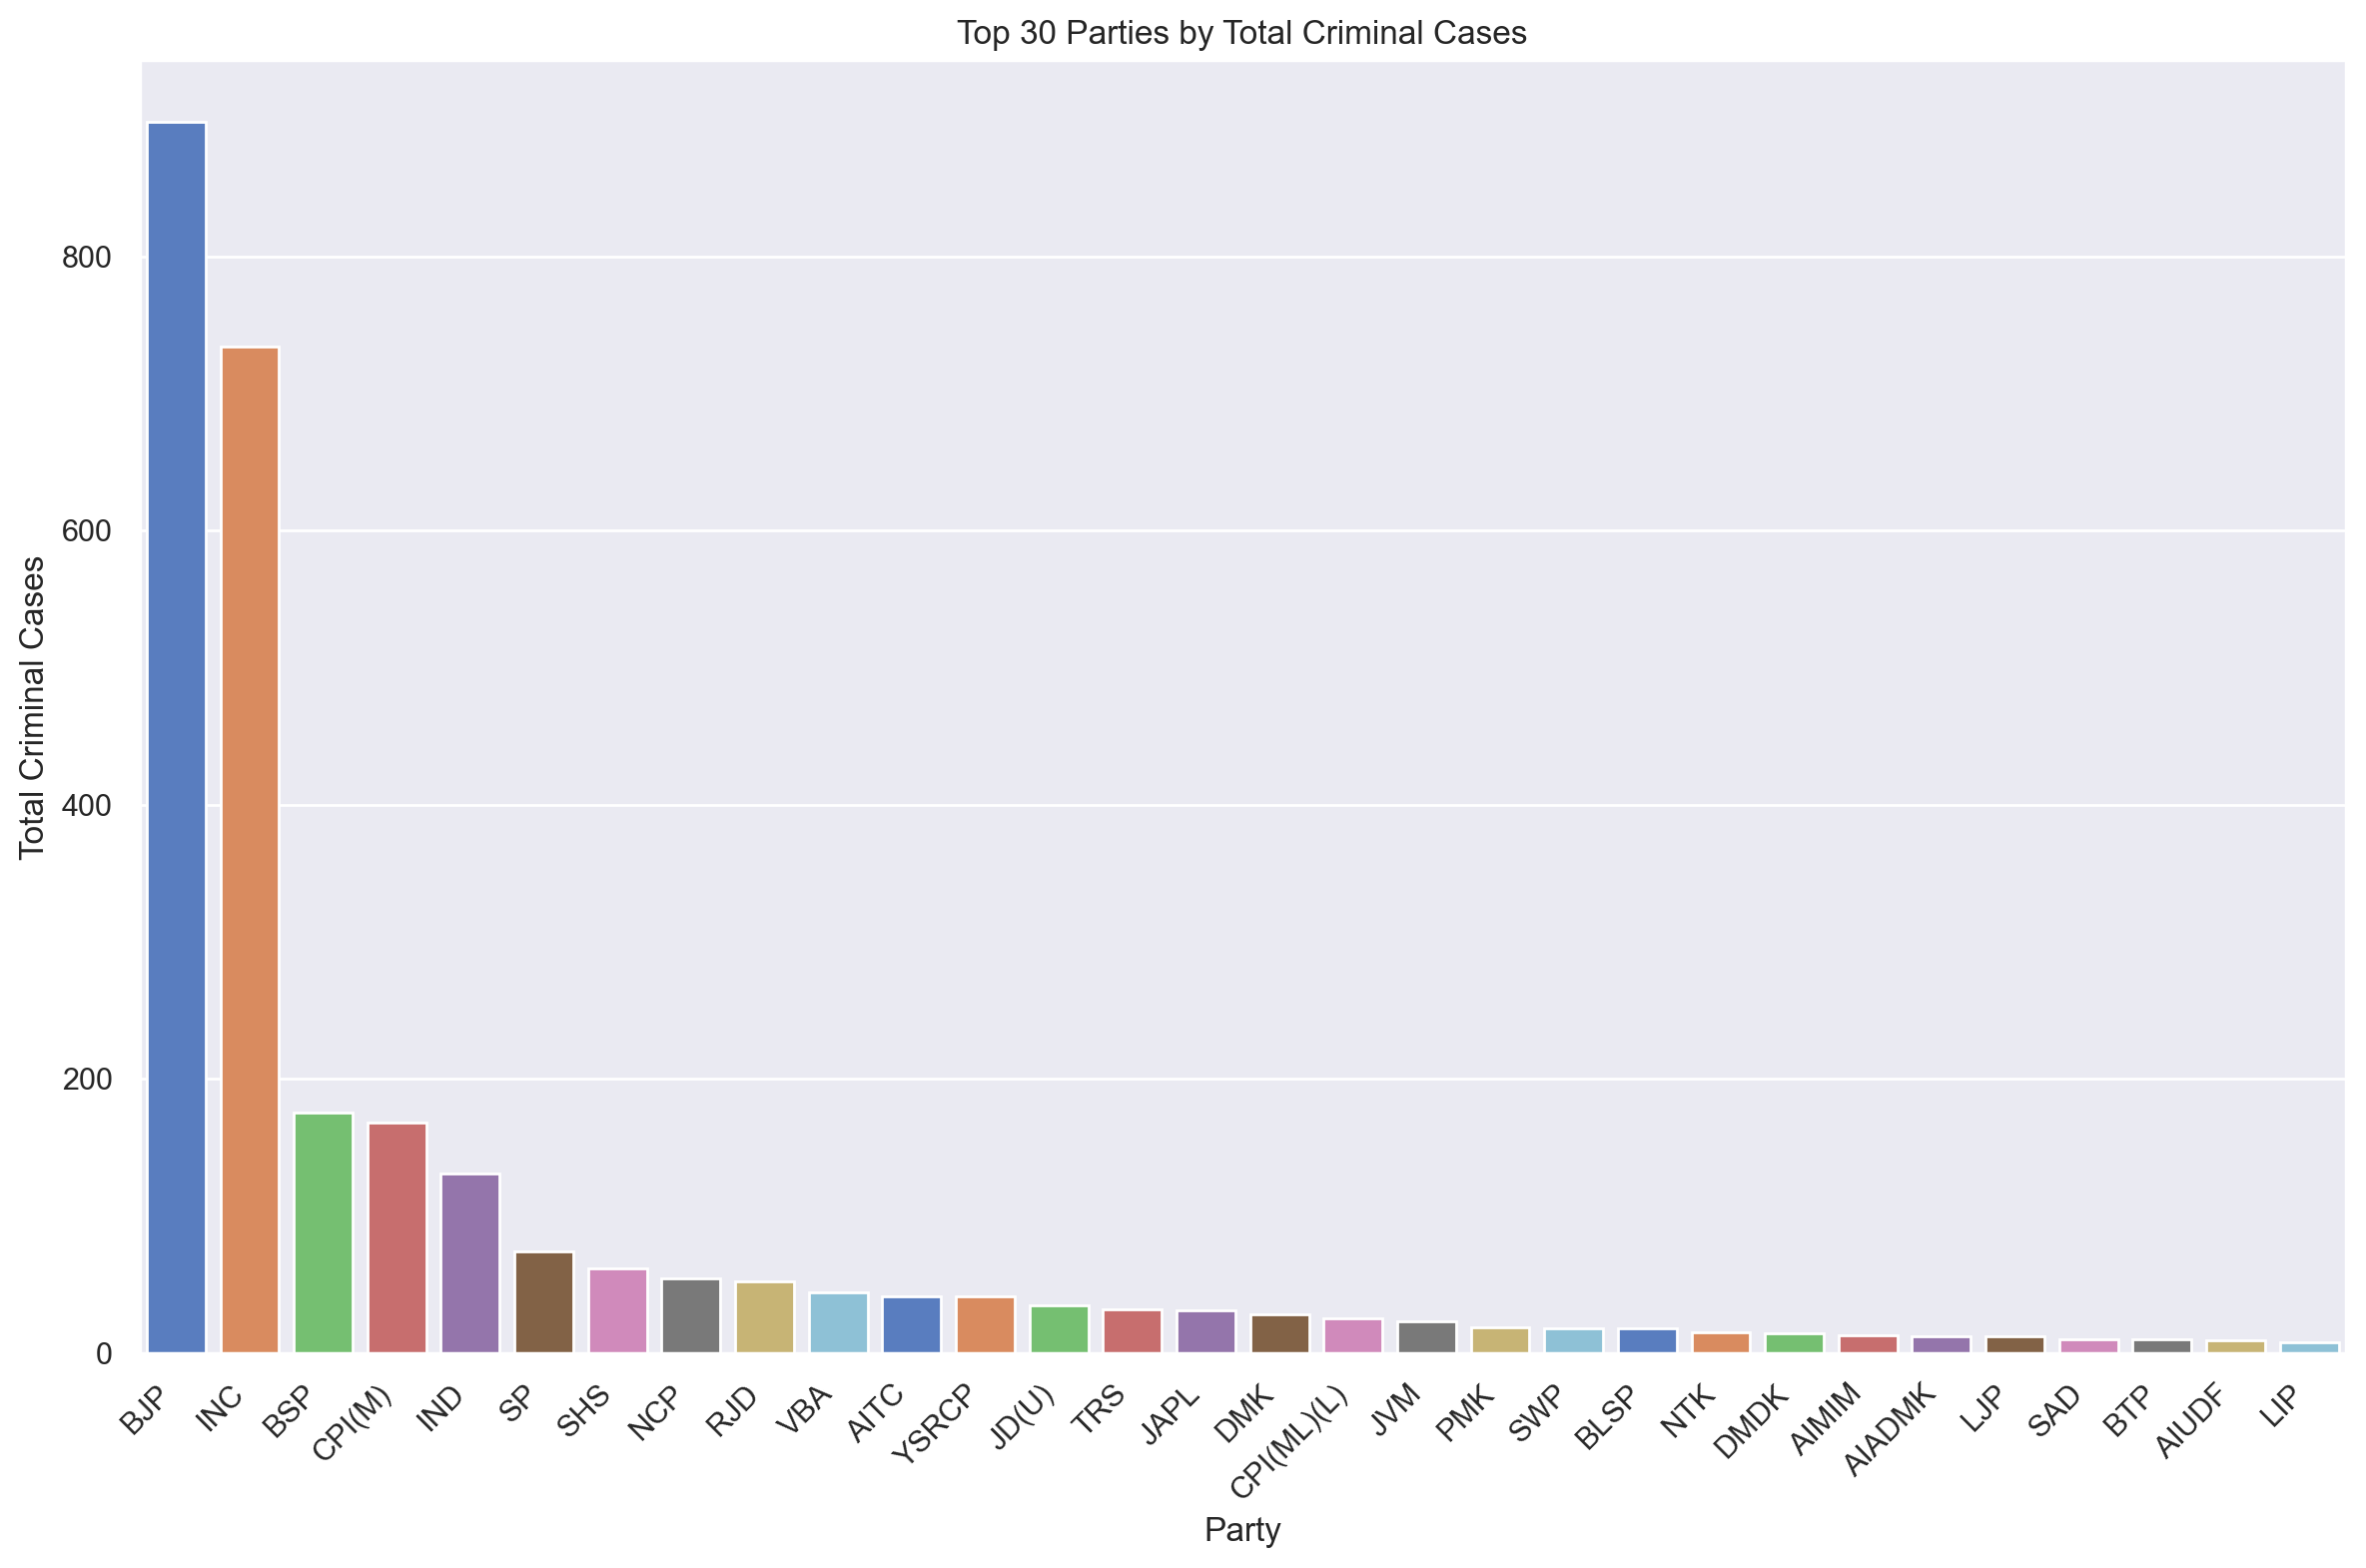

In [105]:
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].str.replace('Not Available', '0')
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].fillna('0')

# Convert 'CRIMINAL CASES' to integer
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int)

# Filter and group by PARTY, then sum CRIMINAL CASES and sort
criminal_cases = df.groupby('PARTY')['CRIMINAL CASES'].sum().reset_index().sort_values('CRIMINAL CASES', ascending=False).head(30)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=criminal_cases, x='PARTY', y='CRIMINAL CASES', palette='muted')

# Add title and labels
plt.title('Top 30 Parties by Total Criminal Cases')
plt.xlabel('Party')
plt.ylabel('Total Criminal Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Educational Qualification of Candidates

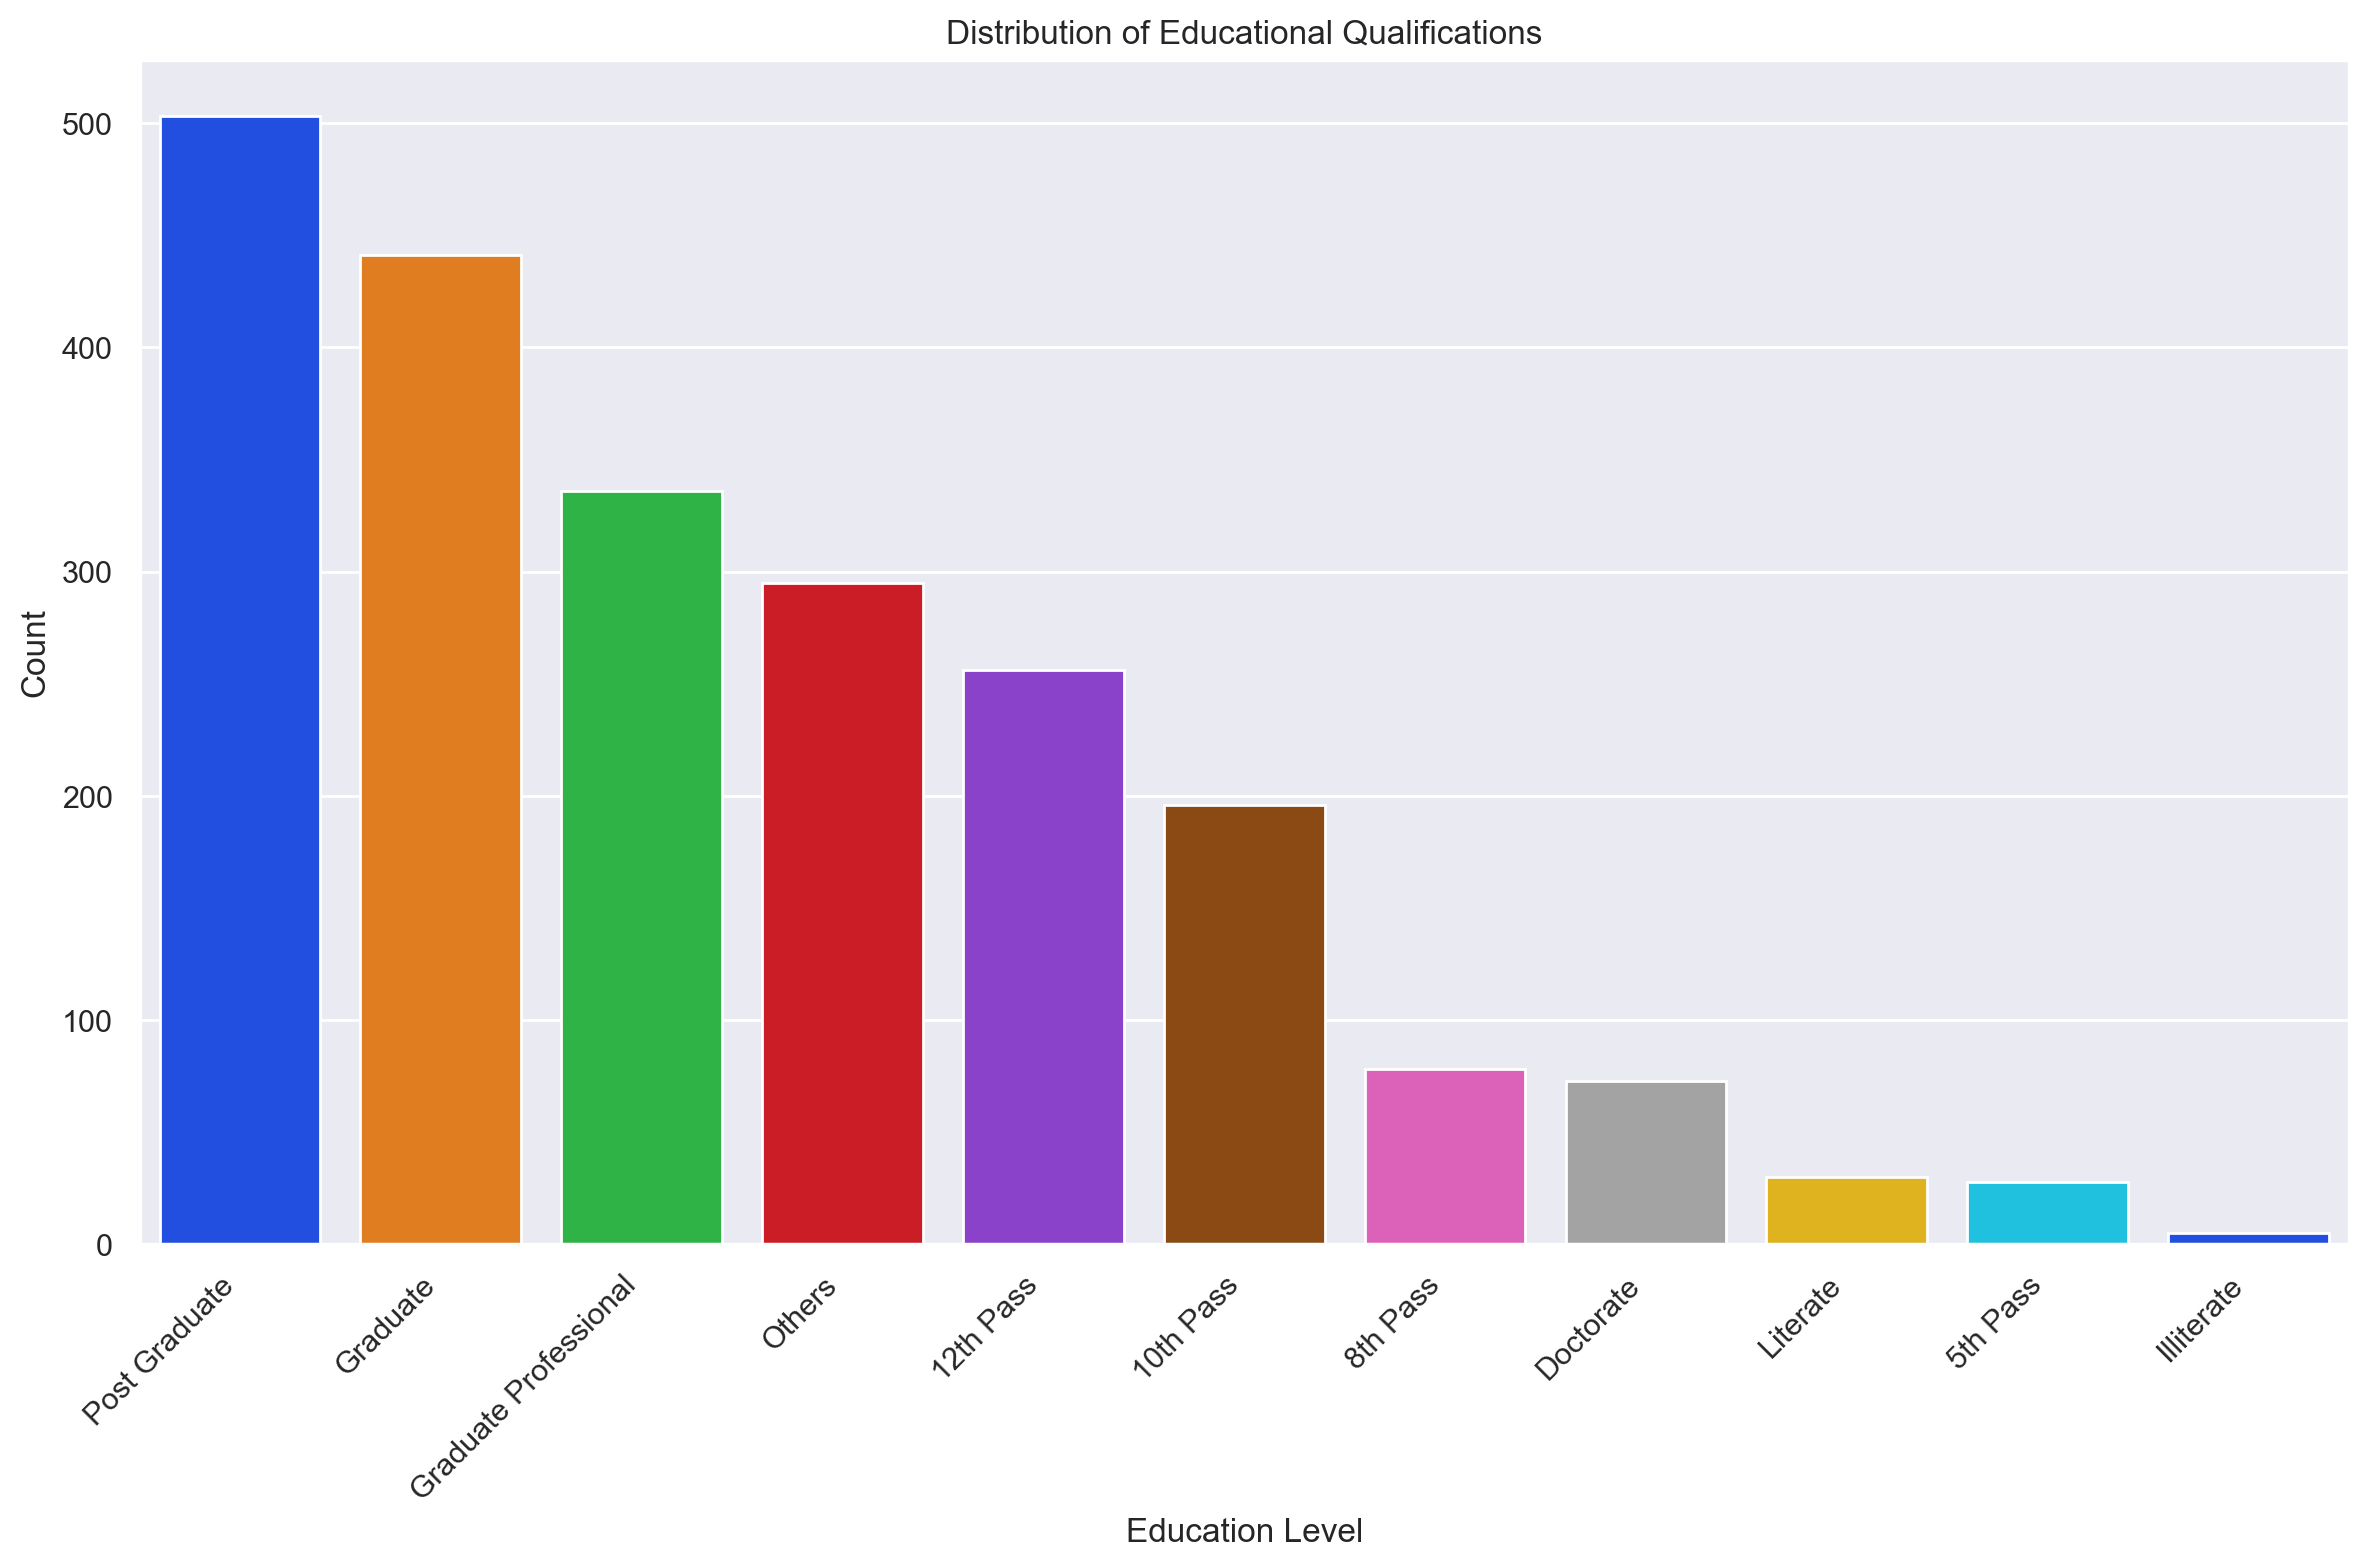

In [106]:
df['EDUCATION'] = df['EDUCATION'].str.replace('Post Graduate\n', 'Post Graduate')
df['EDUCATION'] = df['EDUCATION'].fillna('Others')

# Filter out 'Not Available' values and count the occurrences of each education level
education = df[df['EDUCATION'] != 'Not Available']['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION', 'COUNT']

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=education, x='EDUCATION', y='COUNT', palette='bright')

# Add title and labels
plt.title('Distribution of Educational Qualifications')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

Educational Qualification of Winning Candidates

In [116]:
# Filter the DataFrame to include only winning candidates
won_educated_candidates = df[df['WINNER'] == 1]
won_educated_candidates = won_educated_candidates.sort_values(by = 'WINNER',ascending = False)

df2 = won_educated_candidates['EDUCATION'].value_counts()

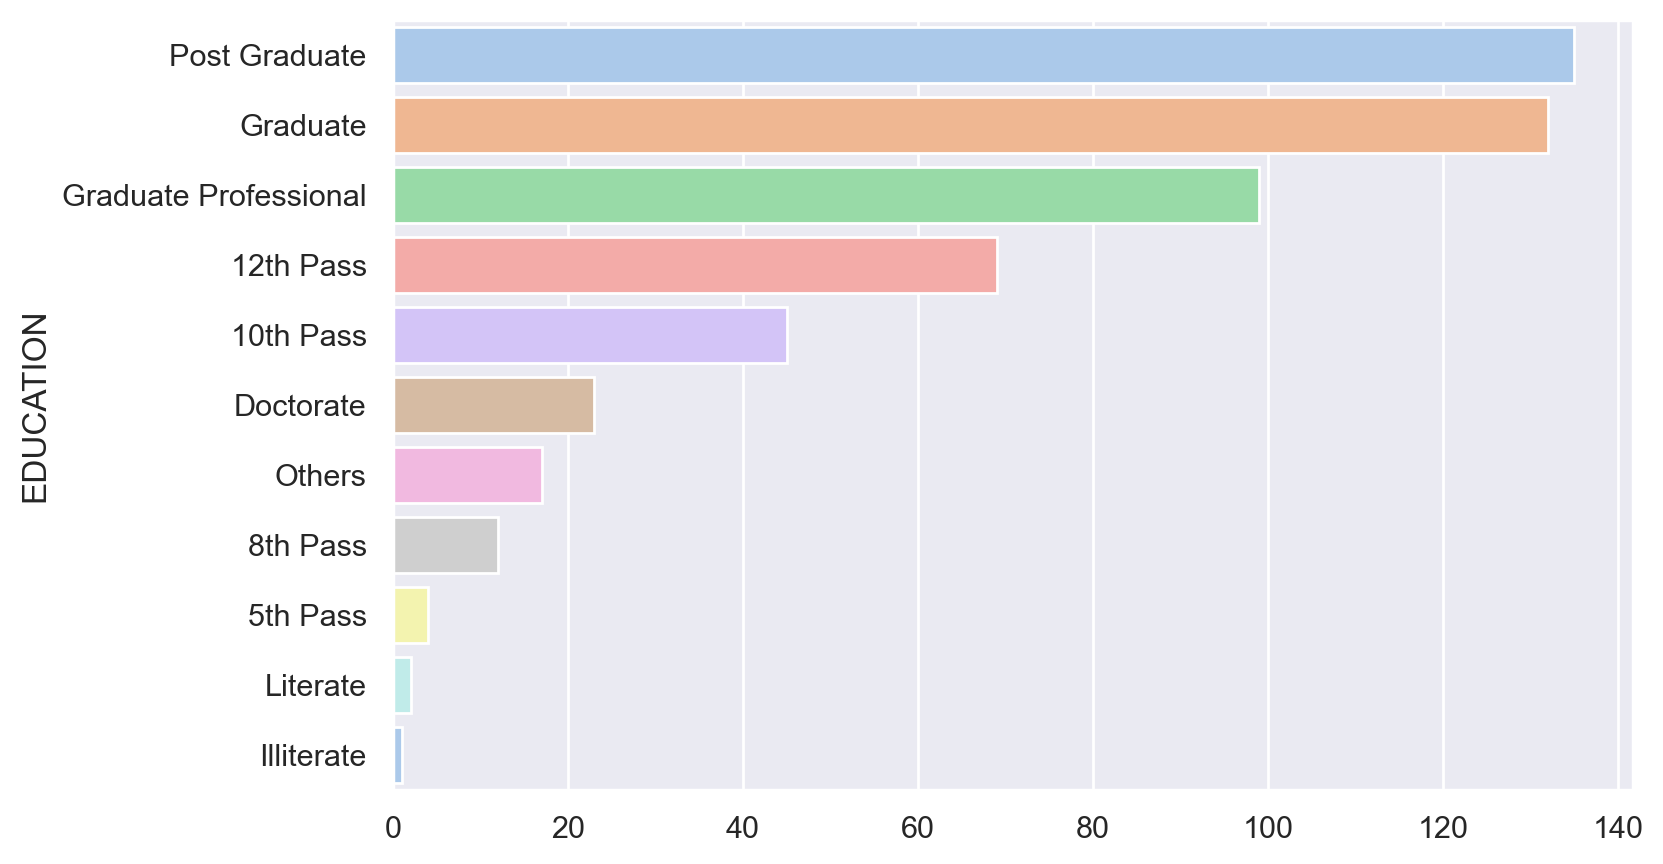

In [118]:
sns.barplot(x = df2.values, y= df2.index, palette = 'pastel')
plt.show()

# Distribution of Winning & Losing Candidates based on Age

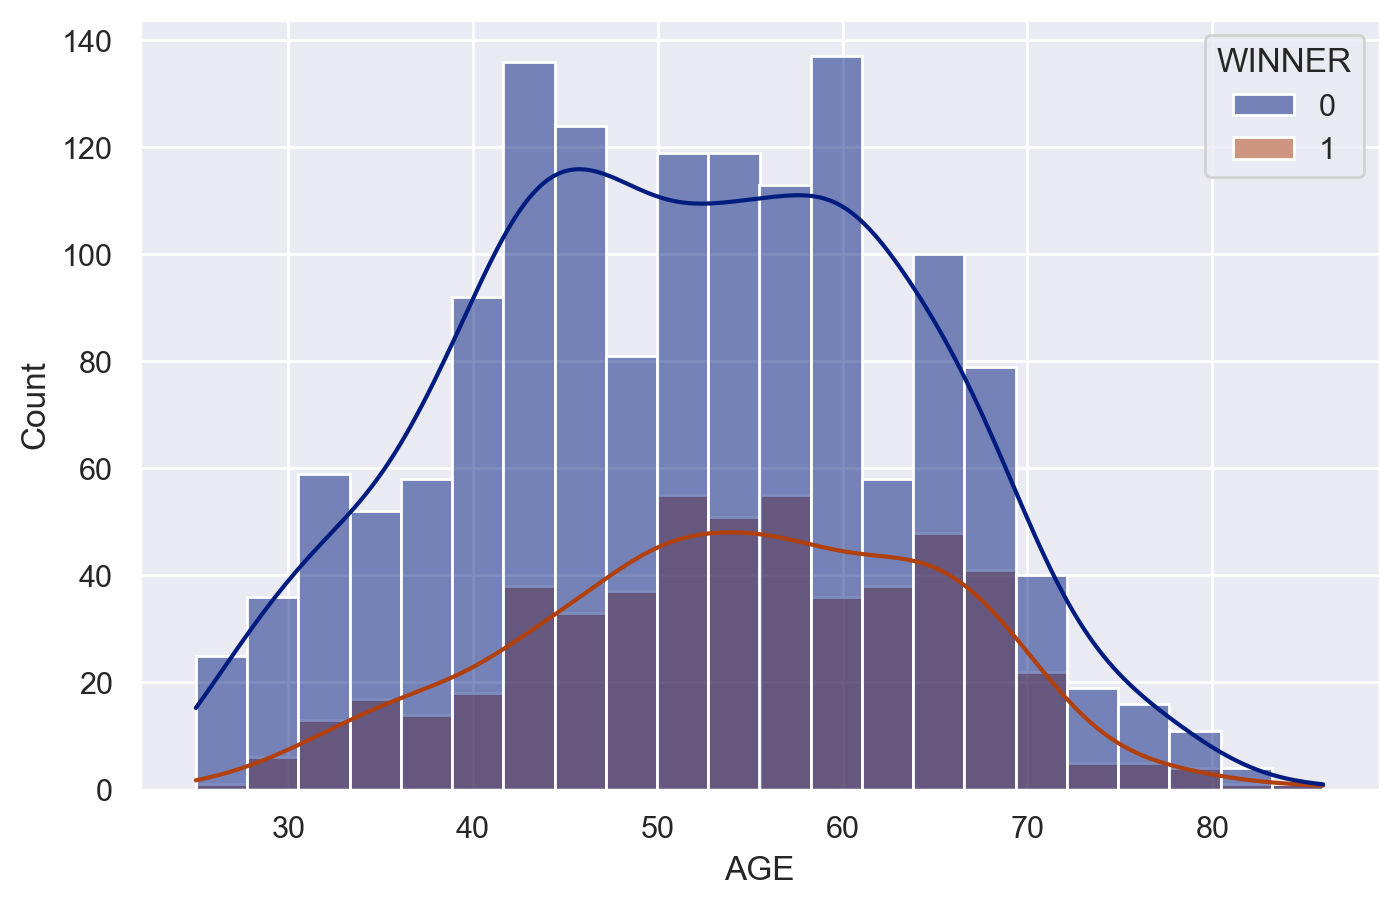

In [121]:
sns.histplot(data=df, x="AGE", hue = 'WINNER', kde=True, palette = 'dark')
plt.show()

# Percentage of votes by States

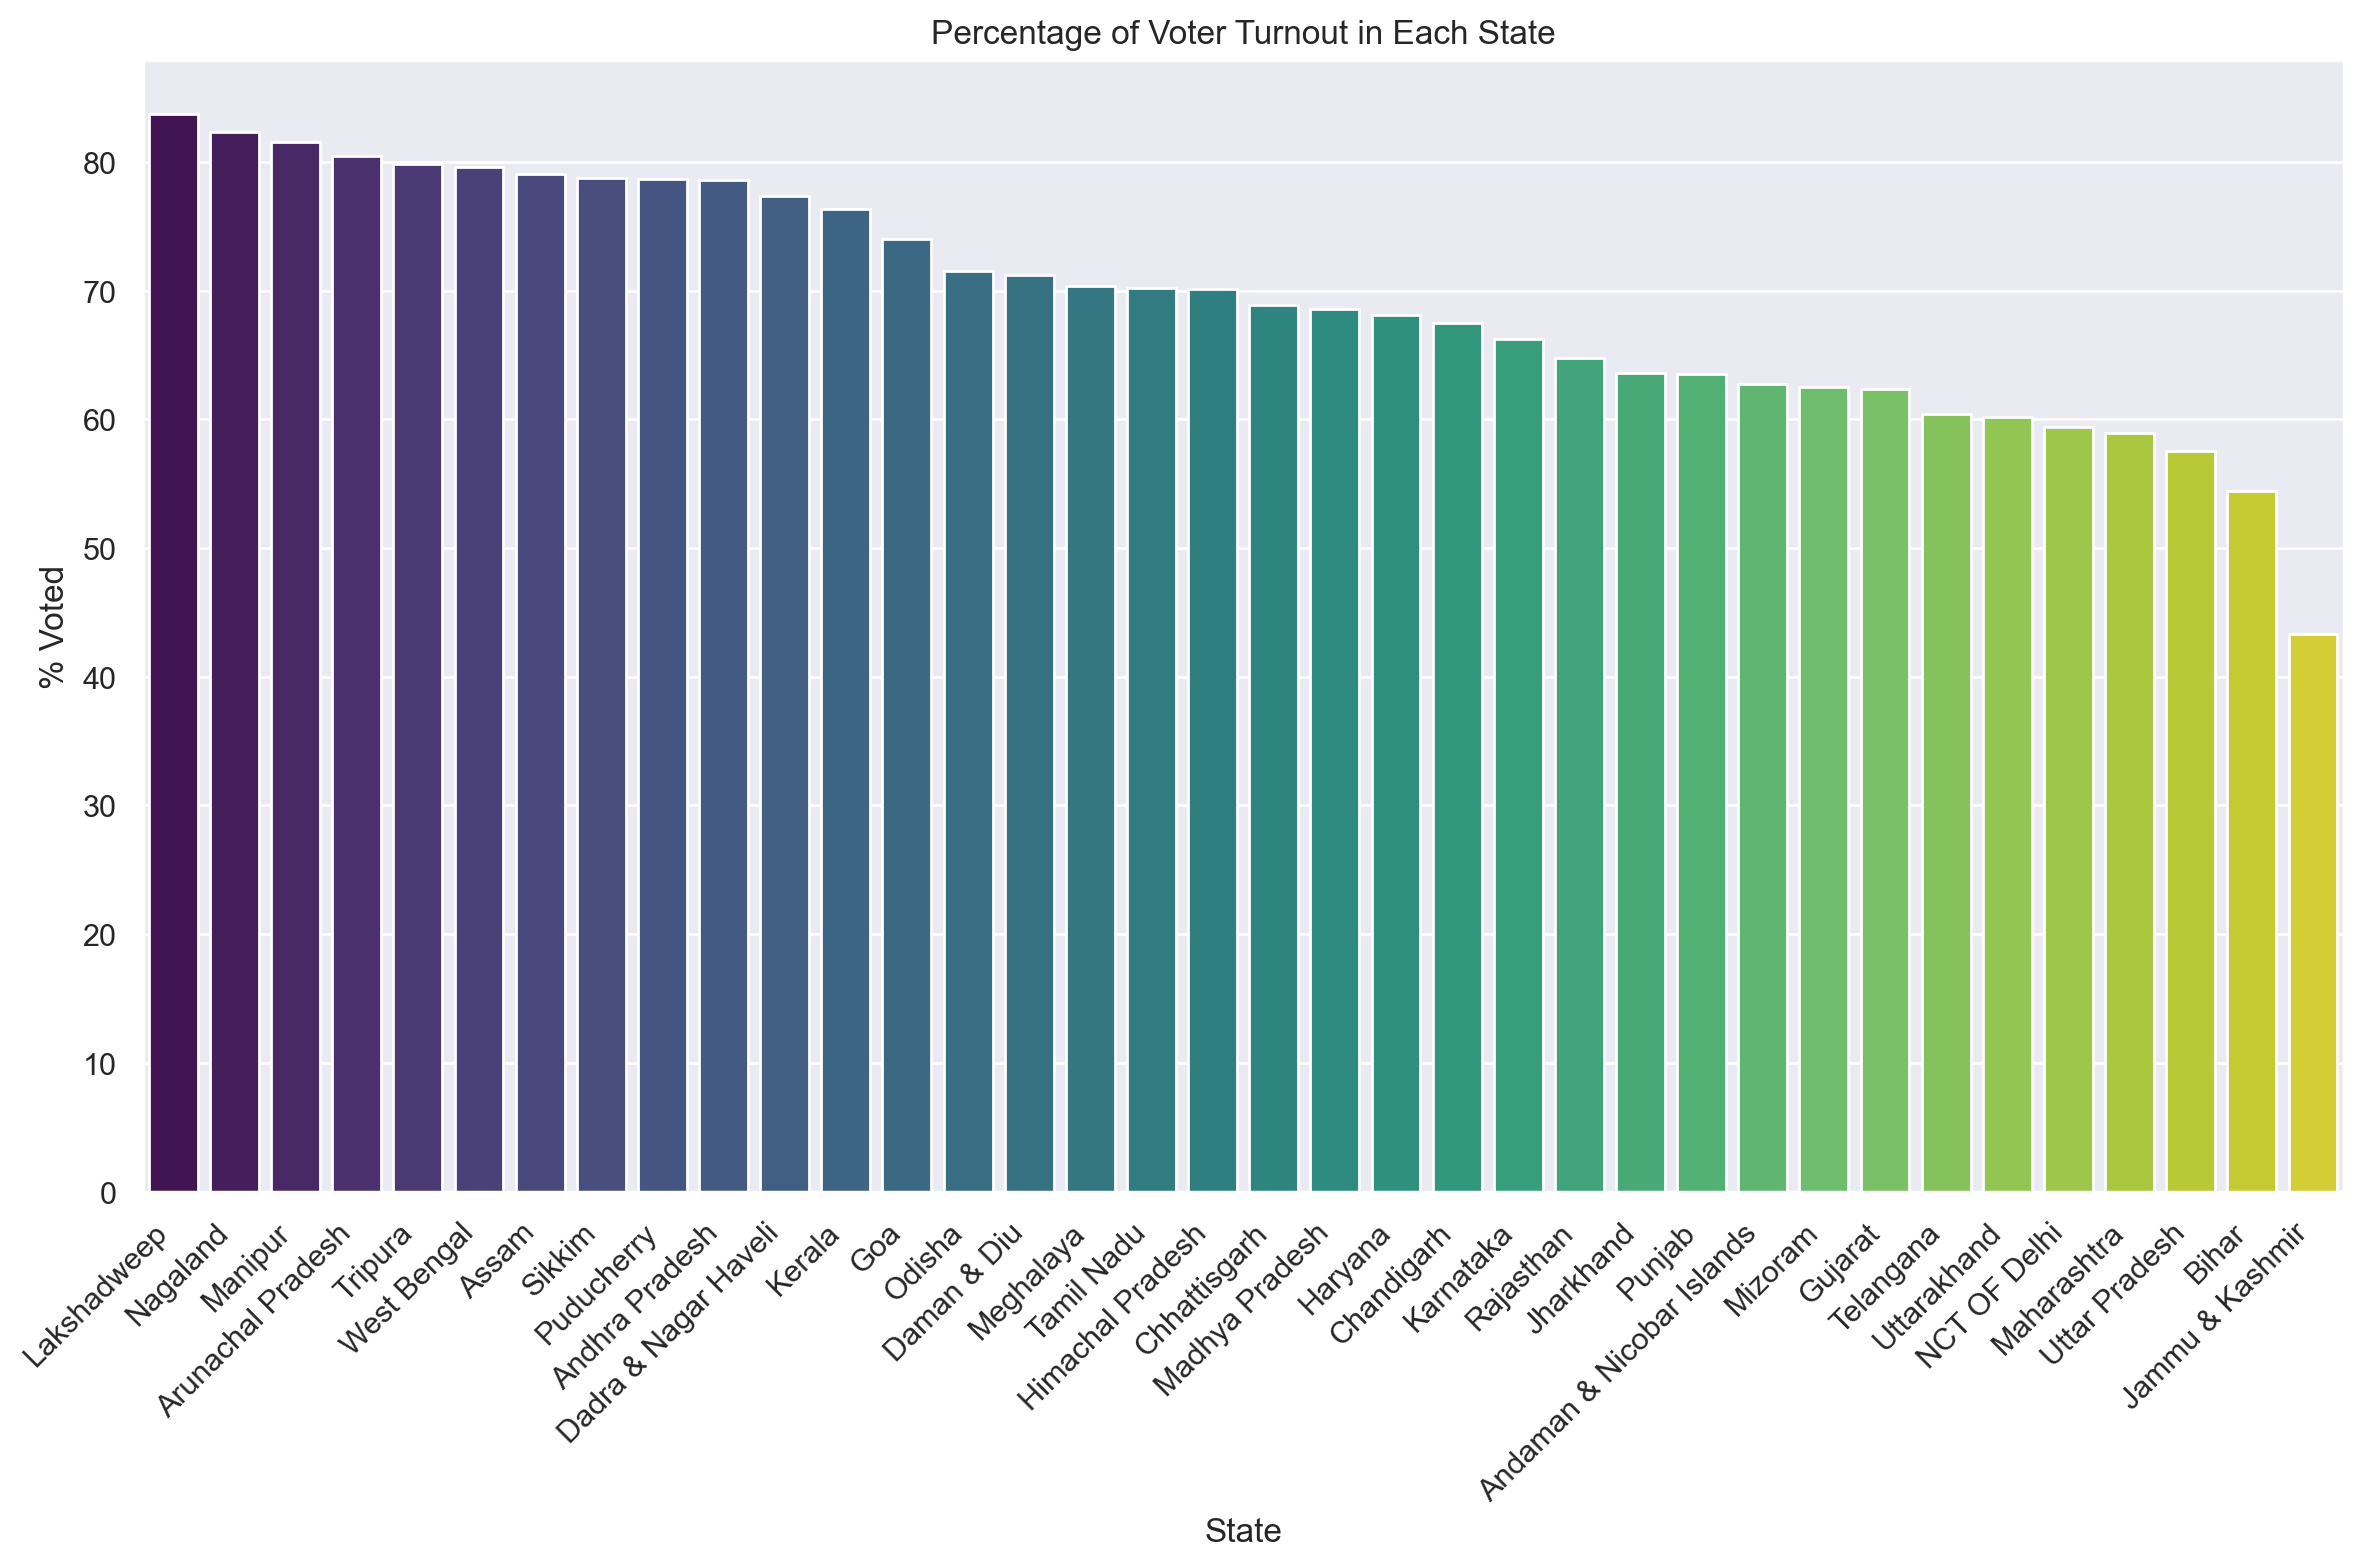

In [123]:
# Compute the percentage of votes cast in each constituency
df_votes_perct_constituency = df.groupby(['STATE', 'CONSTITUENCY', 'TOTAL ELECTORS'])['TOTAL VOTES'].sum().reset_index()
df_votes_perct_constituency['% VOTED IN CONSTITUENCY'] = round(df_votes_perct_constituency['TOTAL VOTES'] * 100 / df_votes_perct_constituency['TOTAL ELECTORS'], 2)

# Aggregate the total number of electors in each state
df_voters_state = df[['STATE', 'CONSTITUENCY', 'TOTAL ELECTORS']].drop_duplicates()
df_voters_state = df_voters_state.groupby('STATE')['TOTAL ELECTORS'].sum().reset_index()

# Calculate the total votes cast in each state
df_votes_state = df.groupby('STATE')['TOTAL VOTES'].sum().reset_index()

# Merge the data to calculate the percentage of voter turnout in each state
df_votes_perct_state = pd.merge(df_votes_state, df_voters_state, on='STATE', how='left')
df_votes_perct_state['% VOTED IN STATE'] = round(df_votes_perct_state['TOTAL VOTES'] * 100 / df_votes_perct_state['TOTAL ELECTORS'], 2)
df_votes_perct_state = df_votes_perct_state.sort_values('% VOTED IN STATE', ascending=False)

# Plot the percentage of voter turnout for each state using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_votes_perct_state, x='STATE', y='% VOTED IN STATE', palette='viridis')

# Add title and labels
plt.title('Percentage of Voter Turnout in Each State')
plt.xlabel('State')
plt.ylabel('% Voted')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Total Voters by State

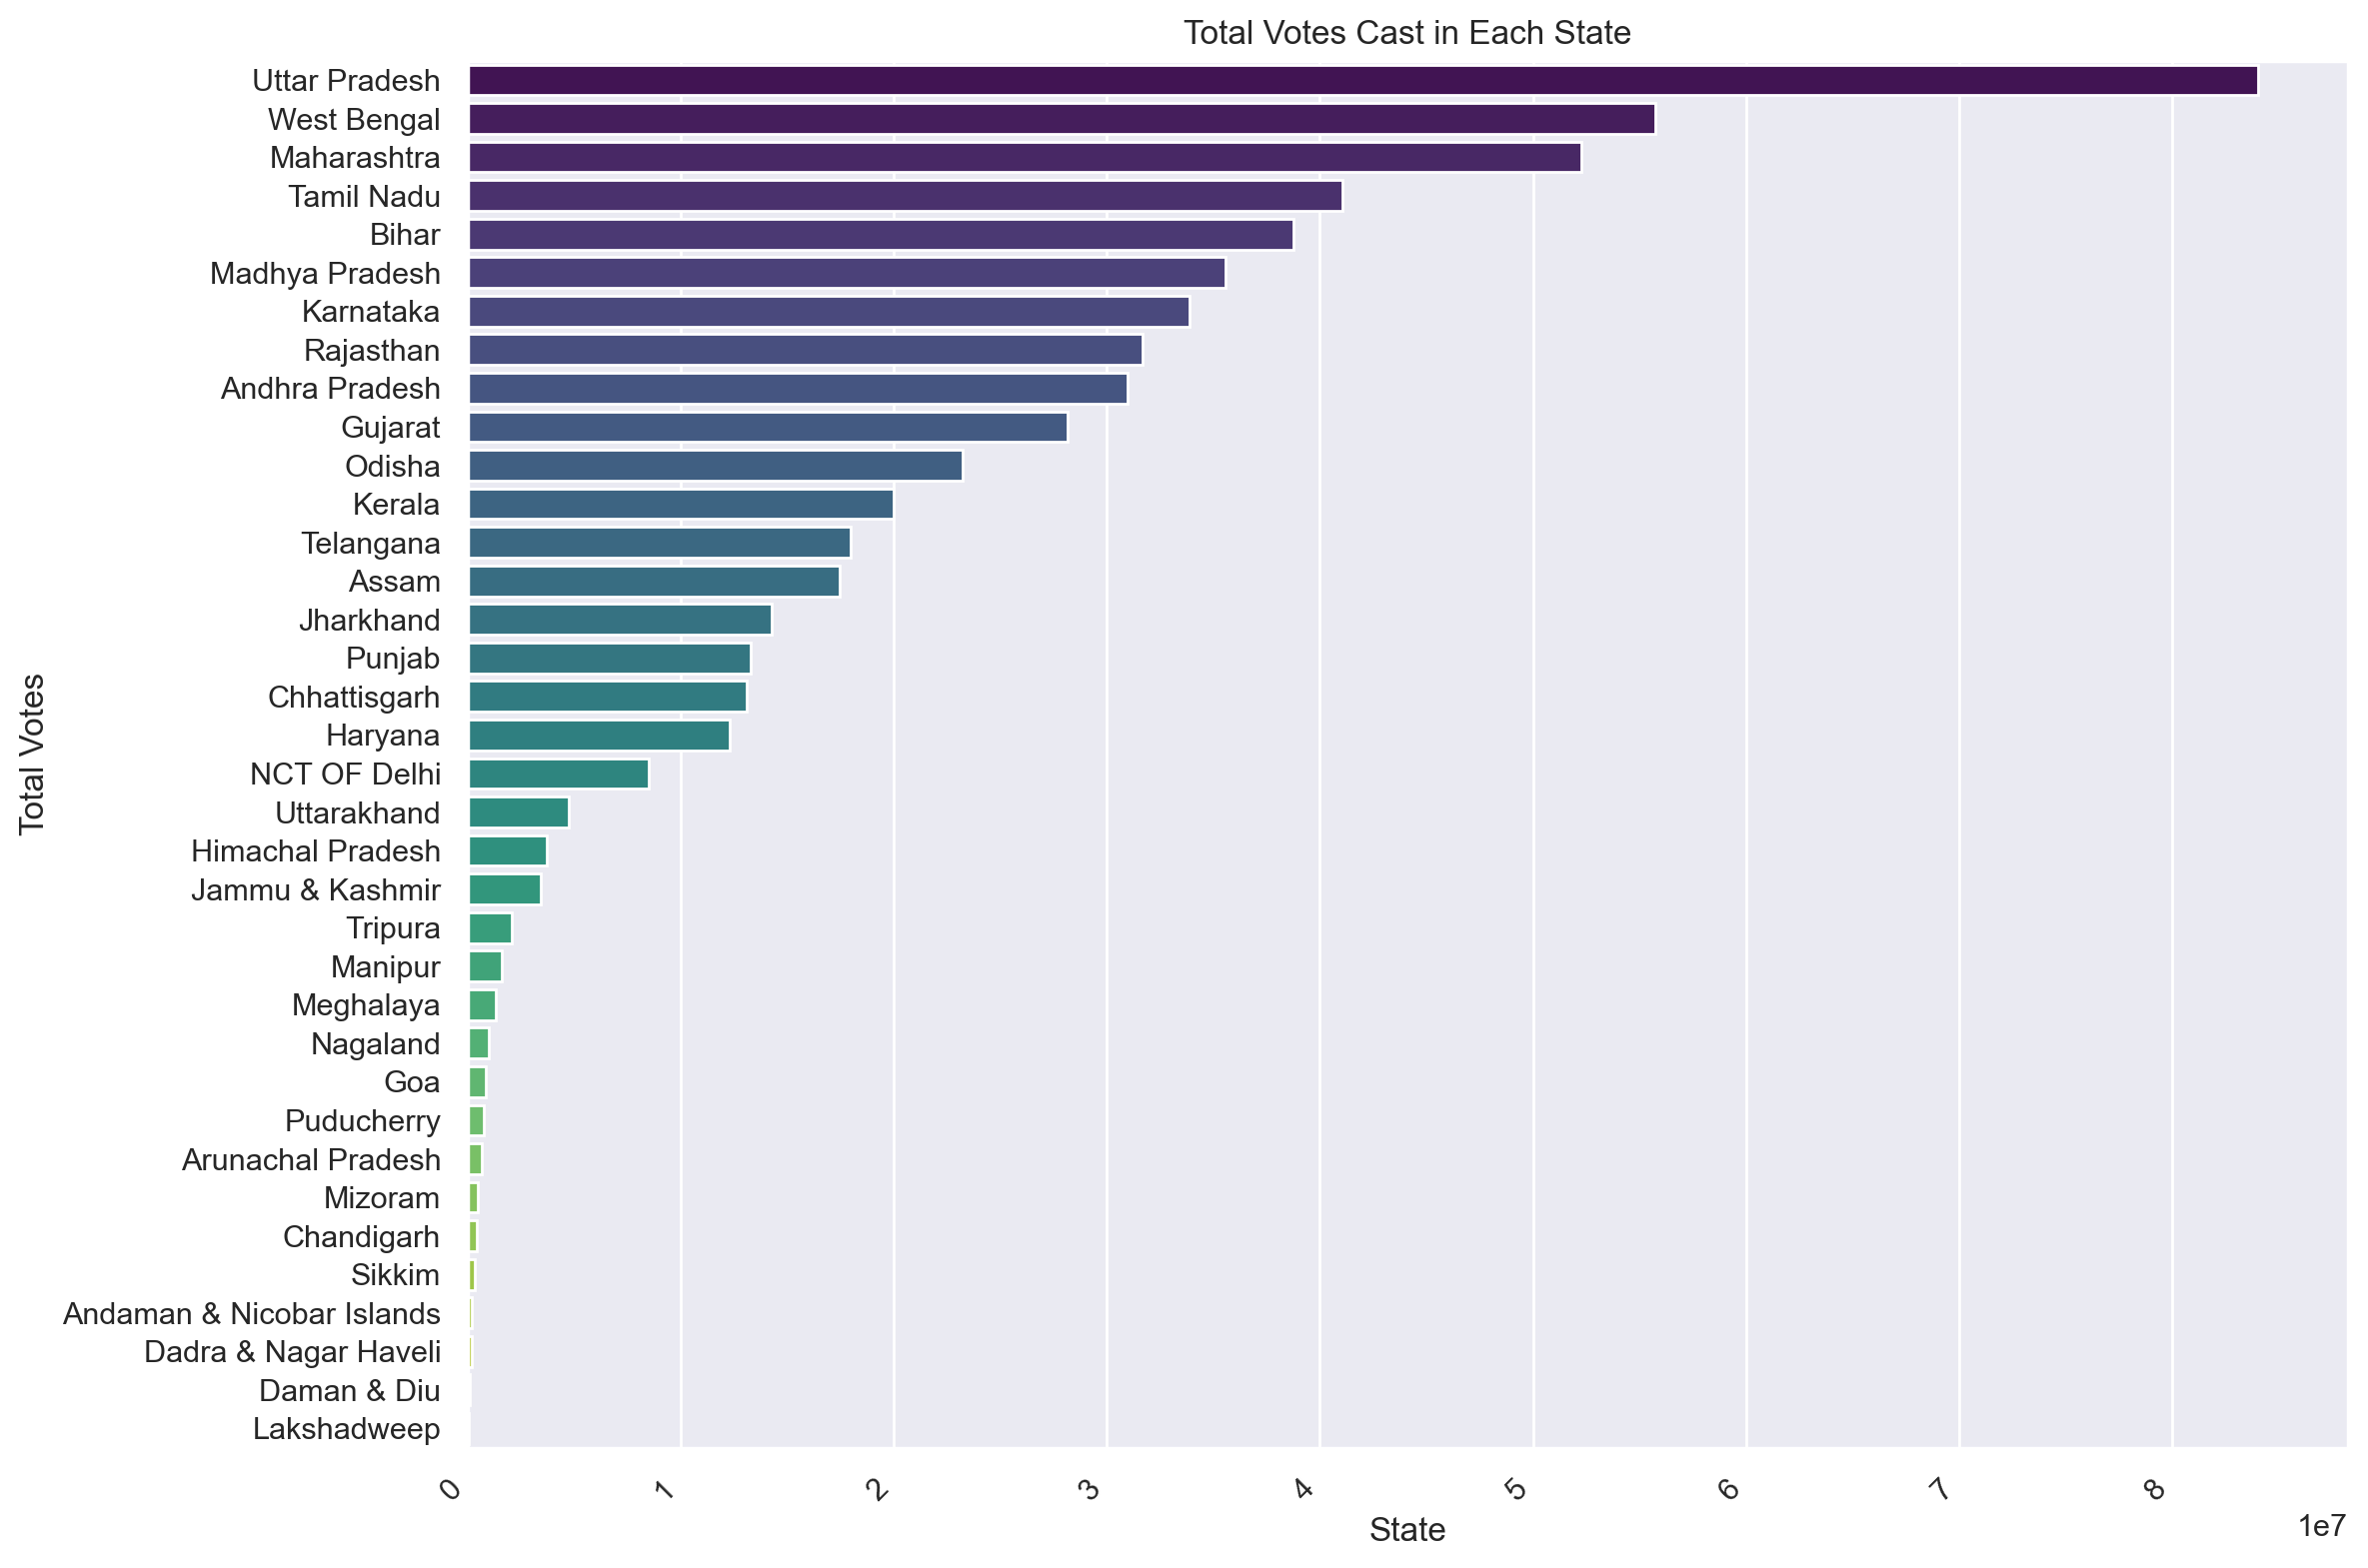

In [127]:
df5 = df_votes_state.sort_values(by = 'TOTAL VOTES', ascending = False)
plt.figure(figsize=(12, 8))
sns.barplot(data=df5, y='STATE', x='TOTAL VOTES', palette='viridis')

# Add title and labels
plt.title('Total Votes Cast in Each State')
plt.xlabel('State')
plt.ylabel('Total Votes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Distribution of Categories

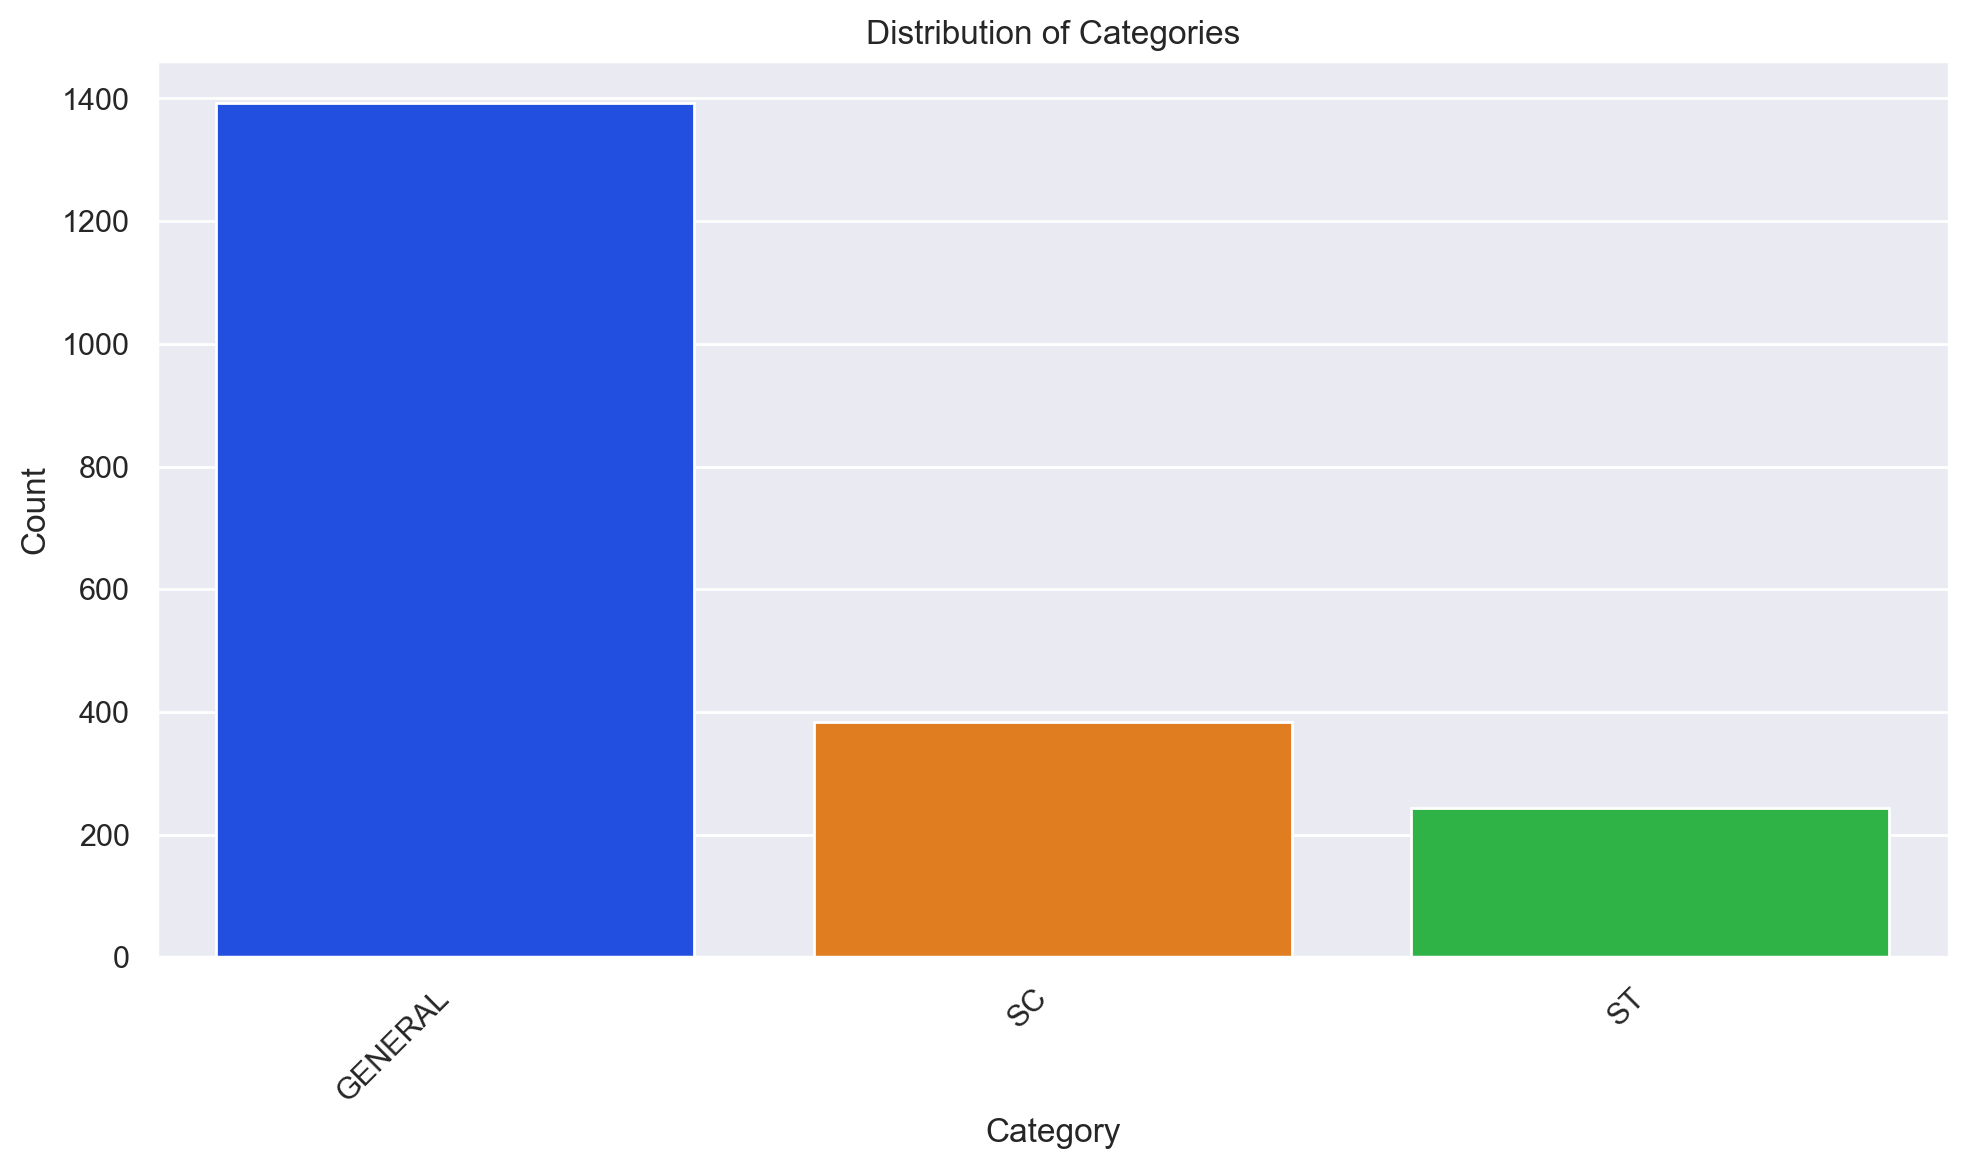

In [132]:
df_category = df['CATEGORY'].value_counts().reset_index()
df_category.columns = ['CATEGORY', 'COUNT']

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_category, x='CATEGORY', y='COUNT', palette='bright')

# Add title and labels
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

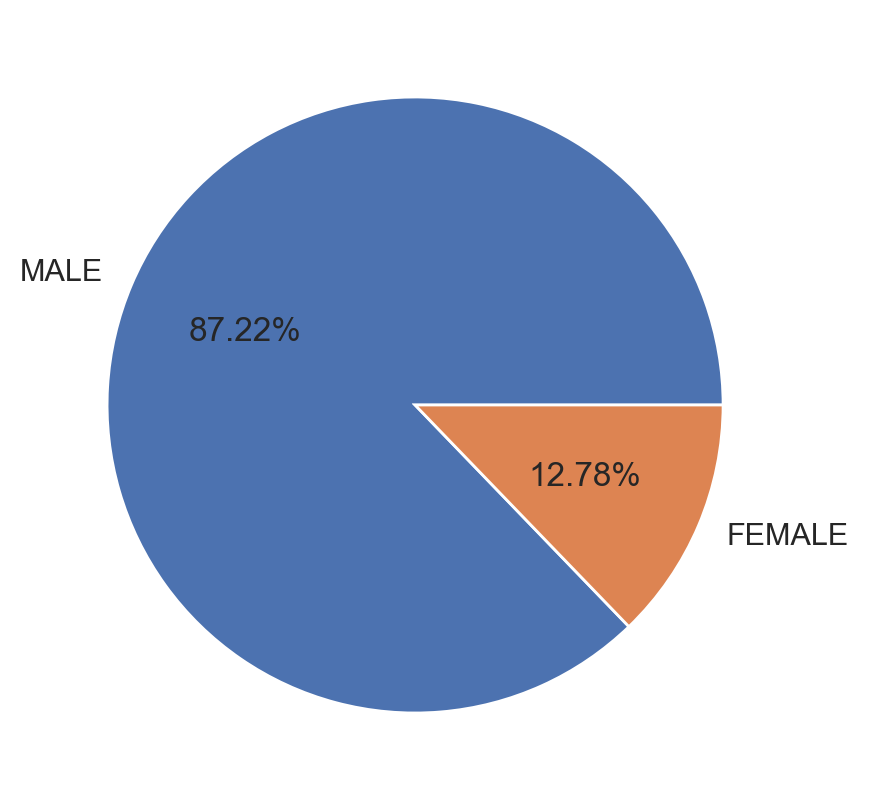

In [139]:
df['GENDER'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.show()

# Winner Prediction Using Random Forest

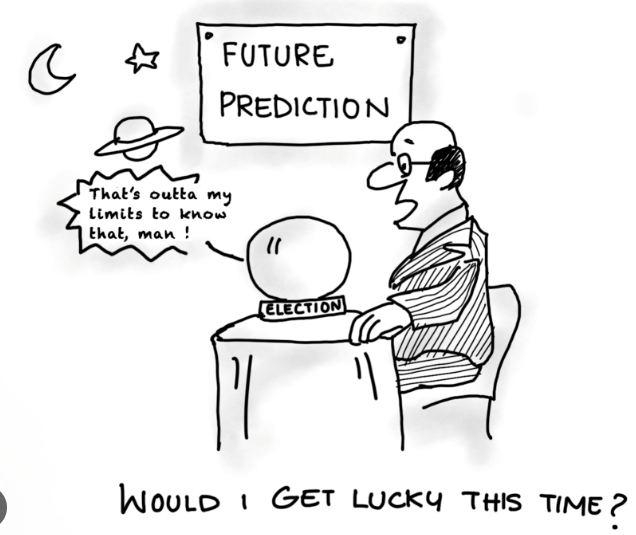

In [145]:
df7 = df[['STATE','CONSTITUENCY','WINNER','Party New','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS']]
cat_cols = ['STATE','CONSTITUENCY','Party New','SYMBOL','GENDER','CATEGORY','EDUCATION']
num_cols = ['CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS']

In [150]:
dataset = pd.get_dummies(df7, columns = cat_cols)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = num_cols
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.dropna(inplace = True)
dataset.head()

WINNER  CRIMINAL CASES       AGE  TOTAL VOTES  TOTAL ELECTORS  \
0       1        7.018675 -0.023051     0.448506       -0.534986   
1       0       -0.179470  0.145491     0.219690       -0.534986   
2       0        0.235807 -0.023051     0.201809       -0.534986   
4       1        0.512659  0.482577     1.501550        0.889409   
5       0       -0.179470 -0.444408     0.674958        0.889409   

   STATE_Andaman & Nicobar Islands  STATE_Andhra Pradesh  \
0                            False                 False   
1                            False                 False   
2                            False                 False   
4                            False                 False   
5                            False                 False   

   STATE_Arunachal Pradesh  STATE_Assam  STATE_Bihar  STATE_Chandigarh  \
0                    False        False        False             False   
1                    False        False        False             False   
2                    False        False        False             False   
4                    False        False        False             False   
5                    False        False        False             False   

   STATE_Chhattisgarh  STATE_Dadra & Nagar Haveli  STATE_Daman & Diu  \
0               False                       False              False   
1               False                       False              False   
2               False                       False              False   
4               False                       False              False   
5               False                       False              False   

   STATE_Goa  STATE_Gujarat  STATE_Haryana  STATE_Himachal Pradesh  \
0      False          False          False                   False   
1      False          False          False                   False   
2      False          False          False                   False   
4      False          False          False                   False   
5      False          False          False                   False   

   STATE_Jammu & Kashmir  STATE_Jharkhand  STATE_Karnataka  STATE_Kerala  \
0                  False            False            False         False   
1                  False            False            False         False   
2                  False            False            False         False   
4                  False            False            False         False   
5                  False            False            False         False   

   STATE_Lakshadweep  STATE_Madhya Pradesh  STATE_Maharashtra  STATE_Manipur  \
0              False                 False              False          False   
1              False                 False              False          False   
2              False                 False              False          False   
4              False                 False              False          False   
5              False                 False              False          False   

   STATE_Meghalaya  STATE_Mizoram  STATE_NCT OF Delhi  STATE_Nagaland  \
0            False          False               False           False   
1            False          False               False           False   
2            False          False               False           False   
4            False          False               False           False   
5            False          False               False           False   

   STATE_Odisha  STATE_Puducherry  STATE_Punjab  STATE_Rajasthan  \
0         False             False         False            False   
1         False             False         False            False   
2         False             False         False            False   
4         False             False         False            False   
5         False             False         False            False   

   STATE_Sikkim  STATE_Tamil Nadu  STATE_Telangana  STATE_Tripura  \
0         False             False             True          False   
1         

Up-Sampling of Minority Class

In [151]:
from sklearn.utils import resample
df_majority = dataset[dataset.WINNER == 0]
df_minority = dataset[dataset.WINNER == 1]
df_minority_upsampled = resample(df_minority, replace = True,n_samples = 1452, random_state = 0) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.WINNER.value_counts()

WINNER
0    1479
1    1452
Name: count, dtype: int64

In [152]:
y = df_upsampled['WINNER']
X = df_upsampled.drop(['WINNER'], axis = 1)

Text(0.5, 1.0, 'Random Forest Classifier scores for different K values')

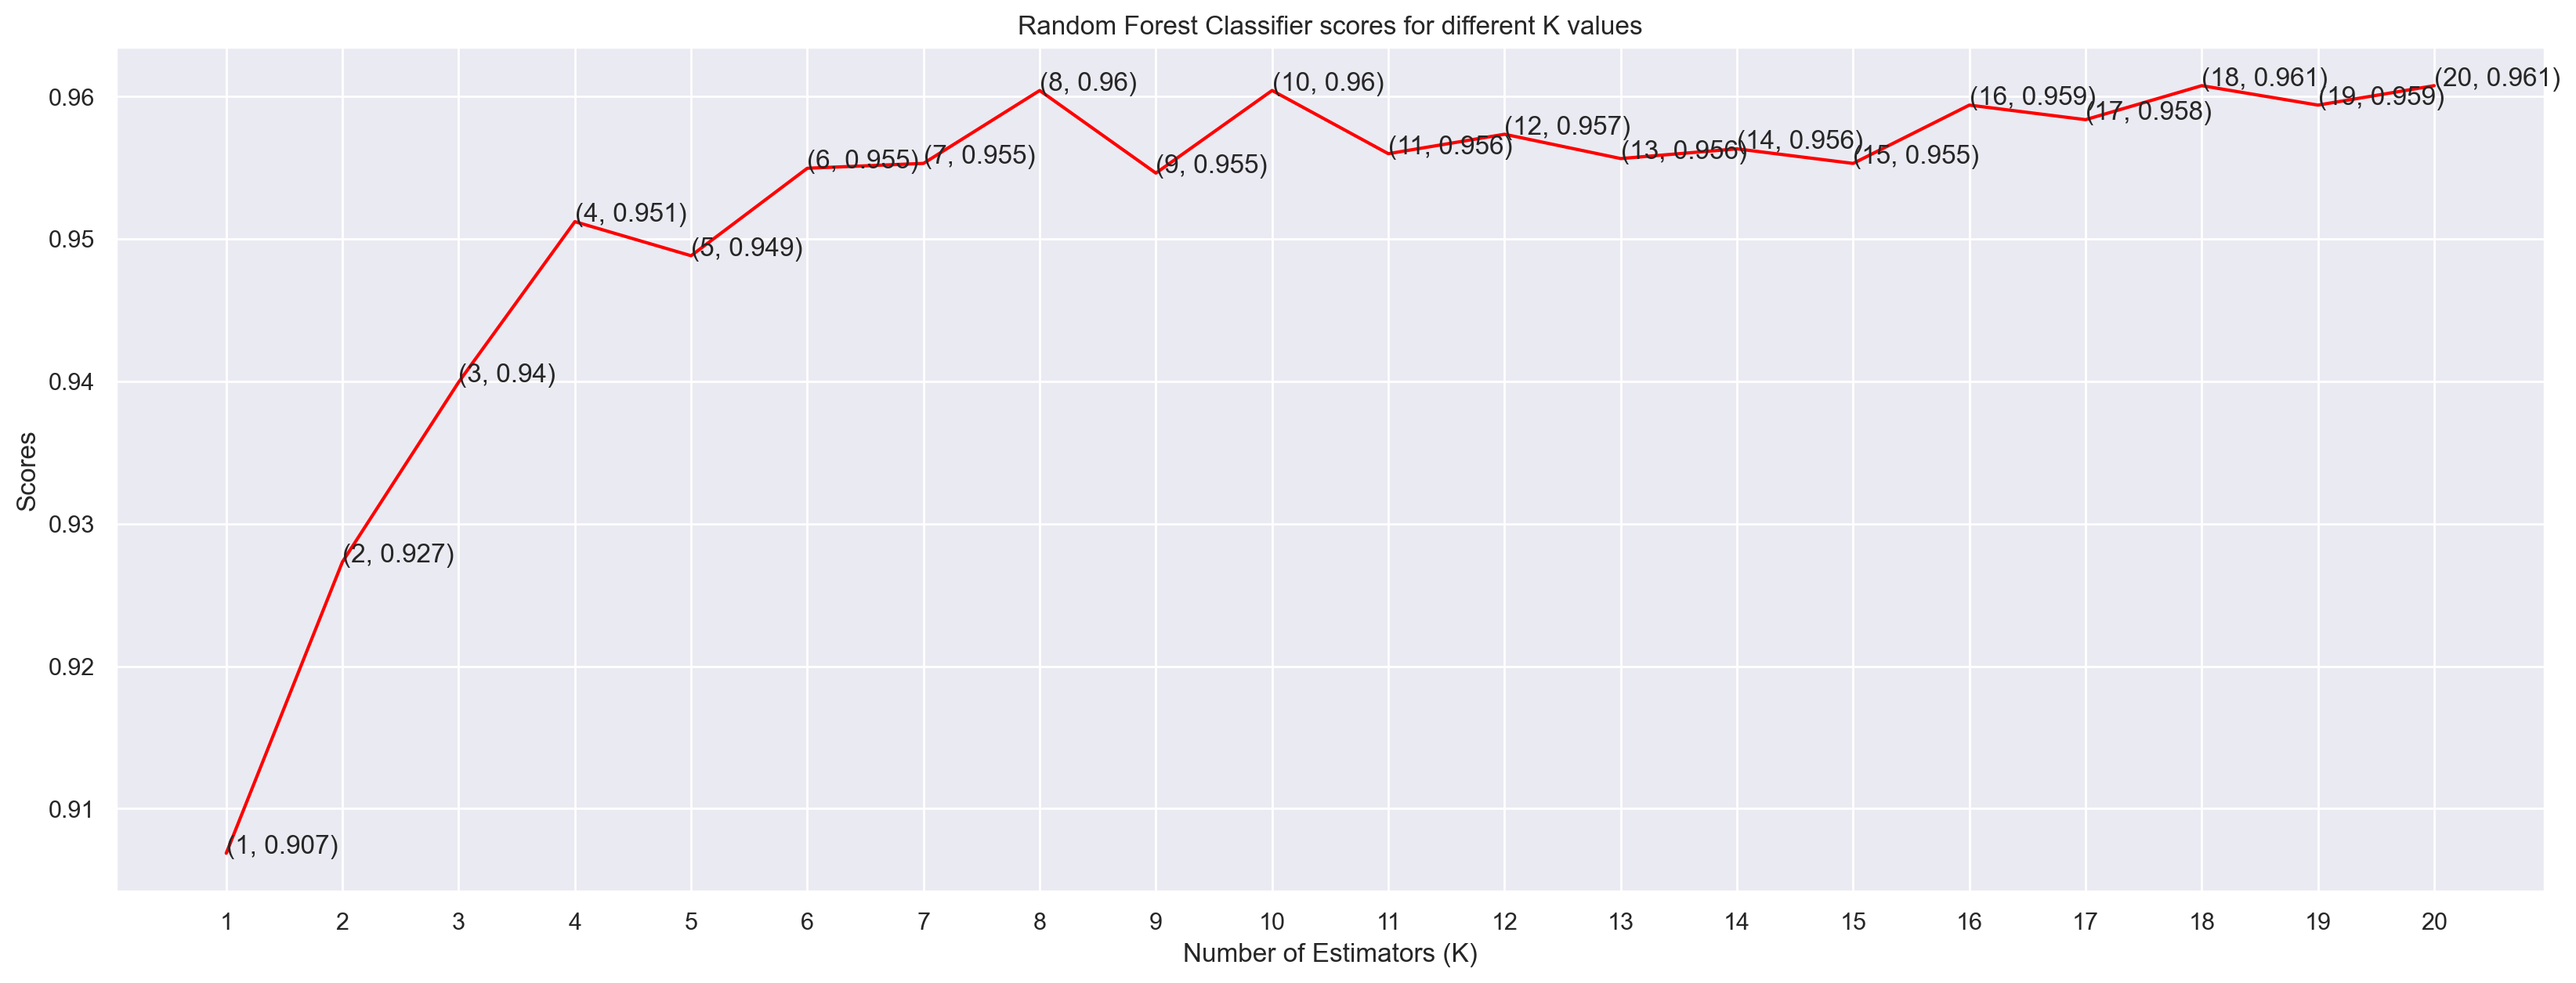

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_scores = []
for k in range(1,21):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rfc_scores.append(score.mean())
plt.figure(figsize =(20,7))
plt.plot([k for k in range(1, 21)], rfc_scores, color = 'red')
for i in range(1,21):
    plt.text(i, rfc_scores[i-1], (i, round(rfc_scores[i-1],3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different K values')

In [154]:
randomforest_classifier= RandomForestClassifier(n_estimators=14,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 95.6327
